<a href="https://colab.research.google.com/github/abusen333/ML/blob/main/3_ICR_Identifying_Age_Related_Conditions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# import libaraies

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
pd.options.display.max_columns = None # show all columns
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import os # accessing directory structure
from sklearn.model_selection import train_test_split # split data into train and test sets
from sklearn.preprocessing import MinMaxScaler # scale data to range 0-1
from sklearn.preprocessing import StandardScaler, OneHotEncoder # standardize data and encode categorical variables
from sklearn.impute import SimpleImputer # impute missing values
from sklearn.compose import ColumnTransformer # apply transformers to columns of an array or pandas DataFrame
from sklearn.pipeline import Pipeline # pipeline constructor and cross validator for evaluation of different pipelines in parallel

In [6]:
# read data
# Train data
train_data = pd.read_csv('train.csv')
#train_data = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
# test data
test_data = pd.read_csv('test.csv')

In [7]:
# Display the first few rows of the dataframe
train_data.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.23868,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,B,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.23868,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,A,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.23868,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,B,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.23868,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,B,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.23868,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,B,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


import numpy as np
from google.colab import autoviz
df_1018660779839569271 = autoviz.get_registered_df('df_1018660779839569271')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1018660779839569271, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_616981706267227462 = autoviz.get_registered_df('df_616981706267227462')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_616981706267227462, *['AB'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2692985080478128811 = autoviz.get_registered_df('df_2692985080478128811')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2692985080478128811, *['AF'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5973966368154671001 = autoviz.get_registered_df('df_5973966368154671001')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5973966368154671001, *['AH'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8199892861580335435 = autoviz.get_registered_df('df_8199892861580335435')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8199892861580335435, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6479087052357875587 = autoviz.get_registered_df('df_6479087052357875587')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6479087052357875587, *['AB'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1972700003513539151 = autoviz.get_registered_df('df_1972700003513539151')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1972700003513539151, *['AF'], **{})
chart

import numpy as np
from google.colab import autoviz
df_480242529683690709 = autoviz.get_registered_df('df_480242529683690709')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_480242529683690709, *['AH'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2262553429760683639 = autoviz.get_registered_df('df_2262553429760683639')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2262553429760683639, *['Id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8345797267142769564 = autoviz.get_registered_df('df_8345797267142769564')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_8345797267142769564, *[[['index', 'AB'], ['AB', 'AF'], ['AF', 'AH'], ['AH', 'AM']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_2725350881327787482 = autoviz.get_registered_df('df_2725350881327787482')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2725350881327787482, *['index', 'Id'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7117727496099023085 = autoviz.get_registered_df('df_7117727496099023085')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7117727496099023085, *['AB', 'Id'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7574042085955375199 = autoviz.get_registered_df('df_7574042085955375199')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7574042085955375199, *['AF', 'Id'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2974699740288824162 = autoviz.get_registered_df('df_2974699740288824162')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2974699740288824162, *['AH', 'Id'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5461221353137750681 = autoviz.get_registered_df('df_5461221353137750681')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5461221353137750681, *['index', 'AB', 'Id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3770507420503053419 = autoviz.get_registered_df('df_3770507420503053419')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3770507420503053419, *['index', 'AF', 'Id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4731479367406652613 = autoviz.get_registered_df('df_4731479367406652613')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4731479367406652613, *['index', 'AH', 'Id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8833404678210683125 = autoviz.get_registered_df('df_8833404678210683125')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8833404678210683125, *['index', 'AM', 'Id'], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


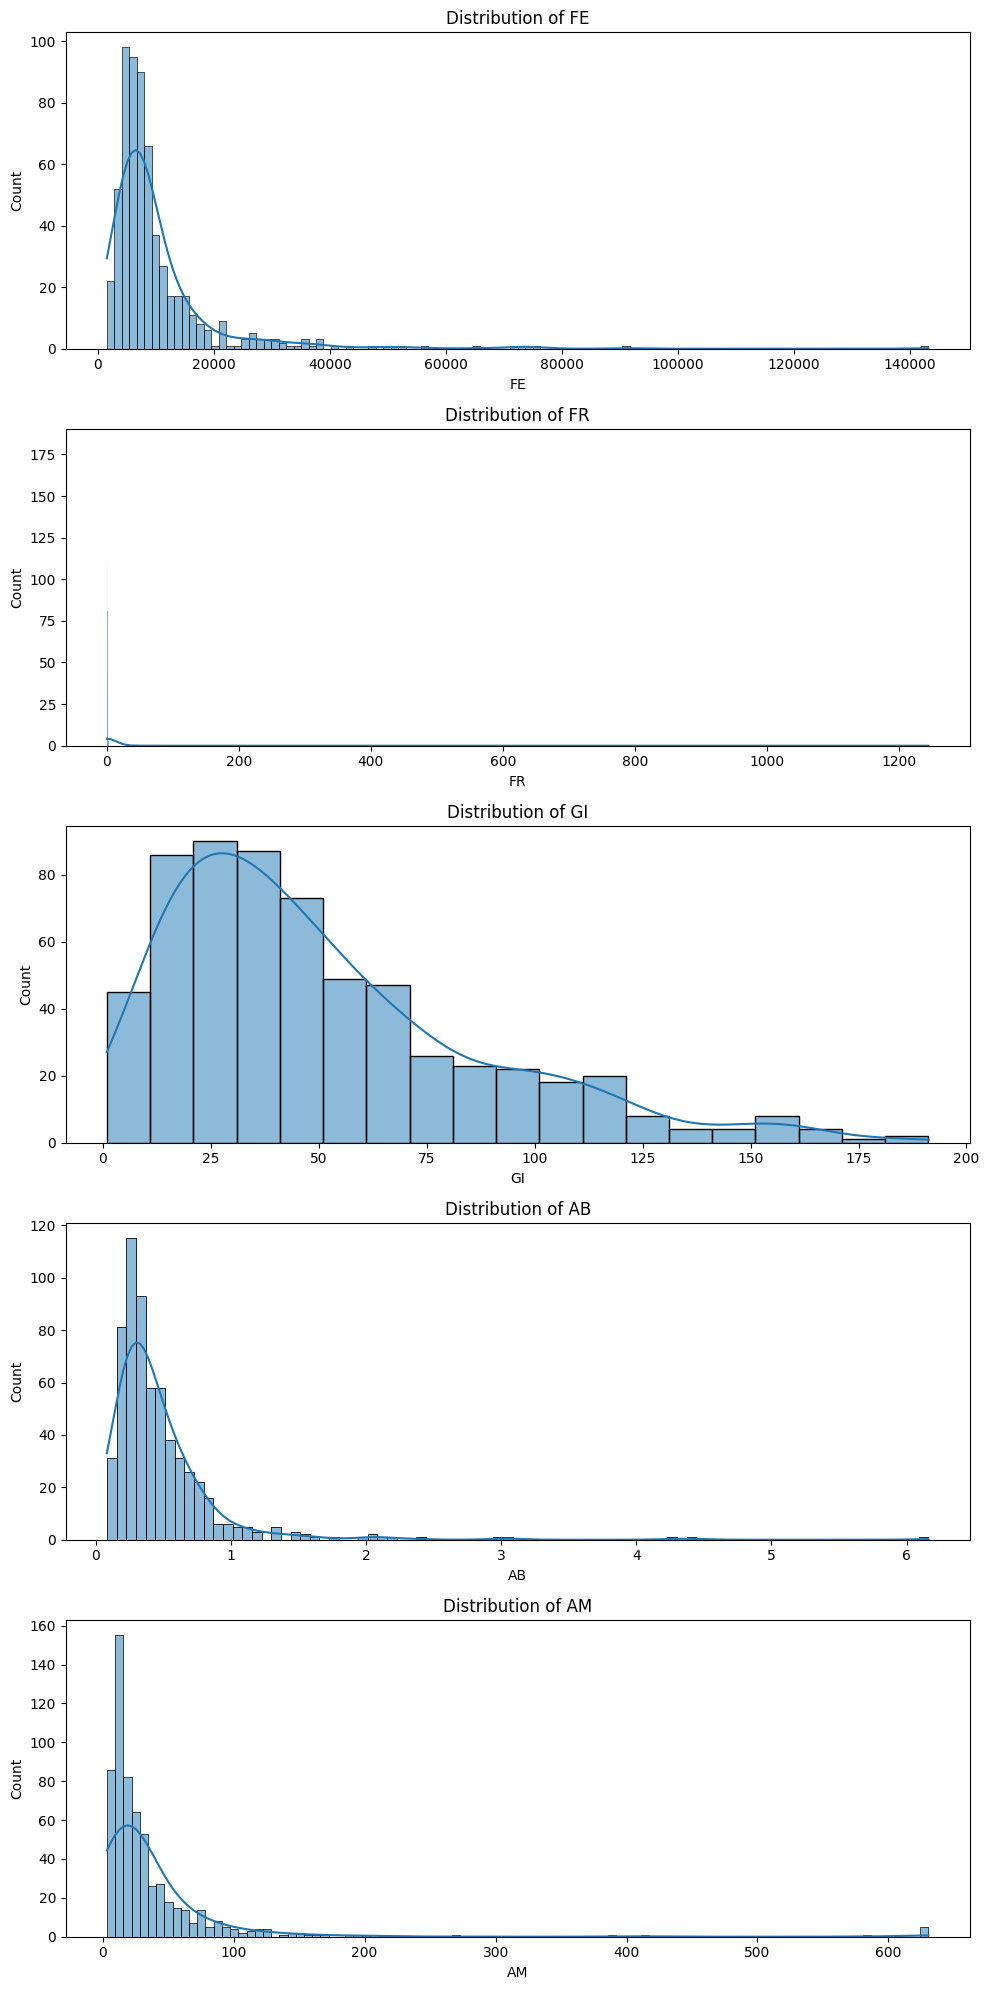

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = train_data
# Select a few random numeric columns for visualization
np.random.seed(0)
selected_columns = np.random.choice(data.drop(['Id', 'EJ', 'Class'], axis=1).columns, size=5)

# Create a subplot of histograms
fig, axes = plt.subplots(nrows=len(selected_columns), figsize=(10, 20))

for ax, column in zip(axes, selected_columns):
    sns.histplot(data[column].dropna(), kde=True, ax=ax)
    ax.set_title(f"Distribution of {column}")

plt.tight_layout()
plt.show()


#Here are the distributions of five randomly selected numerical columns ('DI', 'BD', 'FL', 'CS', 'AZ'):
1.'DI' Column: The distribution seems to be right-skewed with most of the values close to 0 and some higher values.

2.appearing less frequently.

3.'BD' Column: This column also has a right-skewed distribution. Most of the values are close to 0, with a few larger values.

4.'FL' Column: The distribution for this column seems to have several peaks, suggesting a multi-modal distribution. Most of the values are concentrated around 0 to 10, 20 to 30, and 40 to 50.

6.'CS' Column: This column has a right-skewed distribution with most of the values close to 0.

6.'AZ' Column: This column also has a right-skewed distribution with most of the values close to 0.

Next, let's visualize the correlation matrix for these columns to see if there are any strong correlations between these features. Please note that correlation does not imply causation and we're only considering a subset of features here. For a more comprehensive analysis, you might want to consider all features.

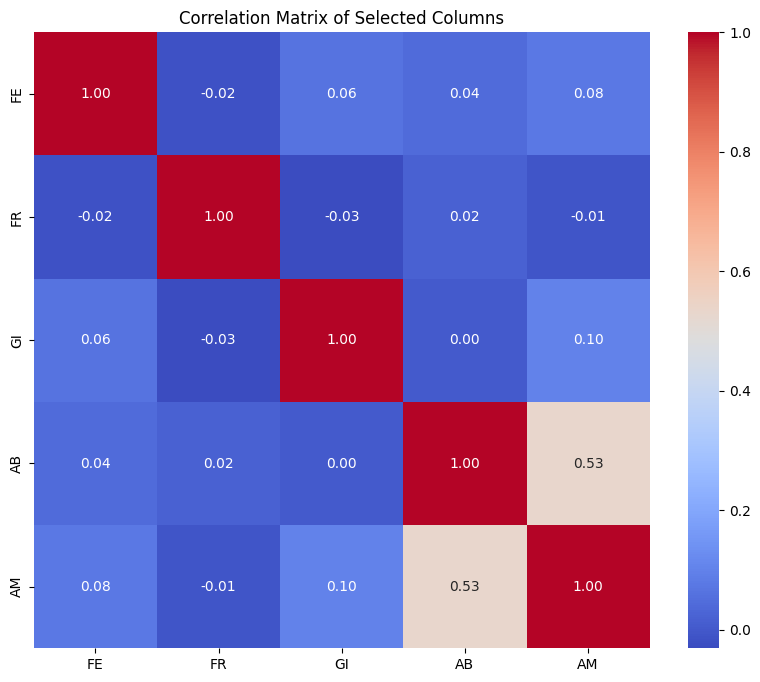

In [9]:
# Calculate the correlation matrix for the selected columns
corr = data[selected_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.title("Correlation Matrix of Selected Columns")
plt.show()


ValueError: ignored

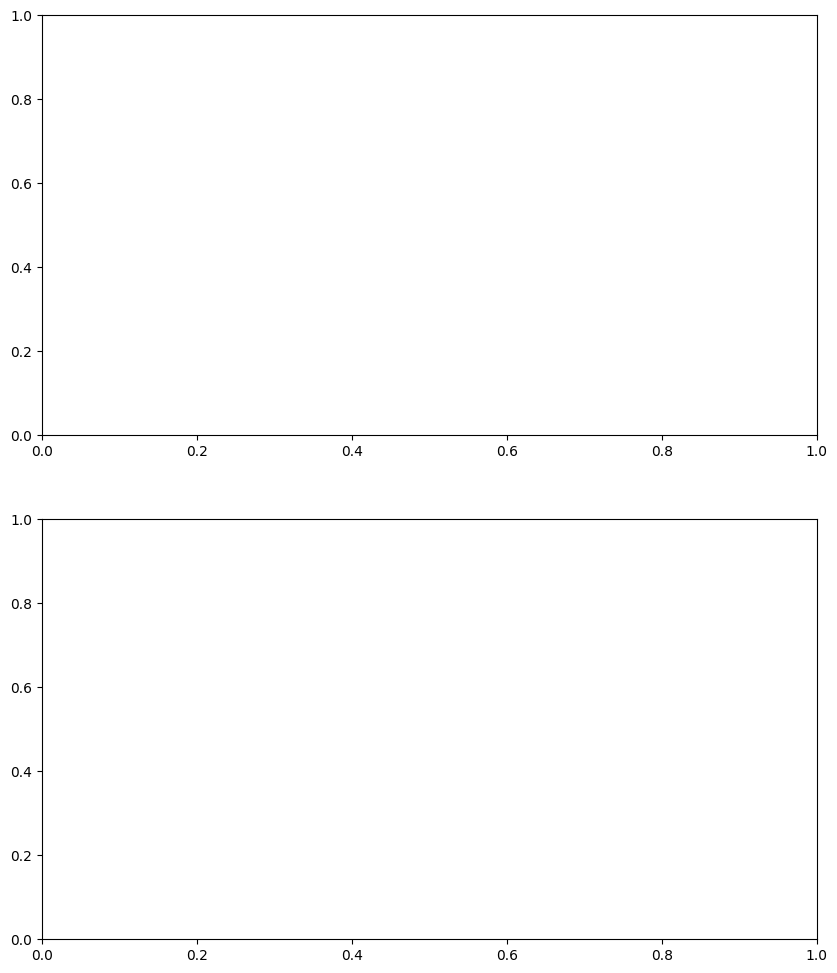

In [50]:
# Create a subplot for bar plots
fig, axes = plt.subplots(nrows=2, figsize=(10, 12))

# Bar plot for 'EJ' column
sns.countplot(data=data, x='EJ', ax=axes[0])
axes[0].set_title("Distribution of 'EJ' Column")

# Bar plot for 'Class' column
sns.countplot(data=data, x='Class', ax=axes[1])
axes[1].set_title("Distribution of 'Class' Column")

plt.tight_layout()
plt.show()


In [10]:
# In this case, it appears that there is no strong correlation between these selected features as most of the absolute values of the correlation coefficients are below 0.5.

Next, let's visualize the distribution of the categorical feature 'EJ' and the target feature 'Class'.

'EJ' Column: The two categories ('A' and 'B') are roughly equally represented, with 'B' being slightly more common than 'A'.

'Class' Column: The target variable 'Class' is imbalanced, with significantly more instances of class '0' than class '1'. This is an important aspect to consider during model training, as it might influence the model's ability to learn from the minority class.

# dive Deep into Traget variable 'Class'

In [12]:
# Calculate the count of each class
class_counts = data['Class'].value_counts()

# Calculate the percentage of each class
class_percentages = data['Class'].value_counts(normalize=True) * 100

class_counts, class_percentages


(0    509
 1    108
 Name: Class, dtype: int64,
 0    82.495948
 1    17.504052
 Name: Class, dtype: float64)

Class '0': 509 instances, making up approximately 82.5% of the data.
Class '1': 108 instances, making up approximately 17.5% of the data.
This shows an imbalance in the target variable, with class '0' being significantly more common than class '1'.

To understand how the target variable relates to the other features, we can plot some of the features against the target variable. For example, we can create boxplots of a few features, separated by class. This can help us see if there are differences in the distributions of these features between the two classes.

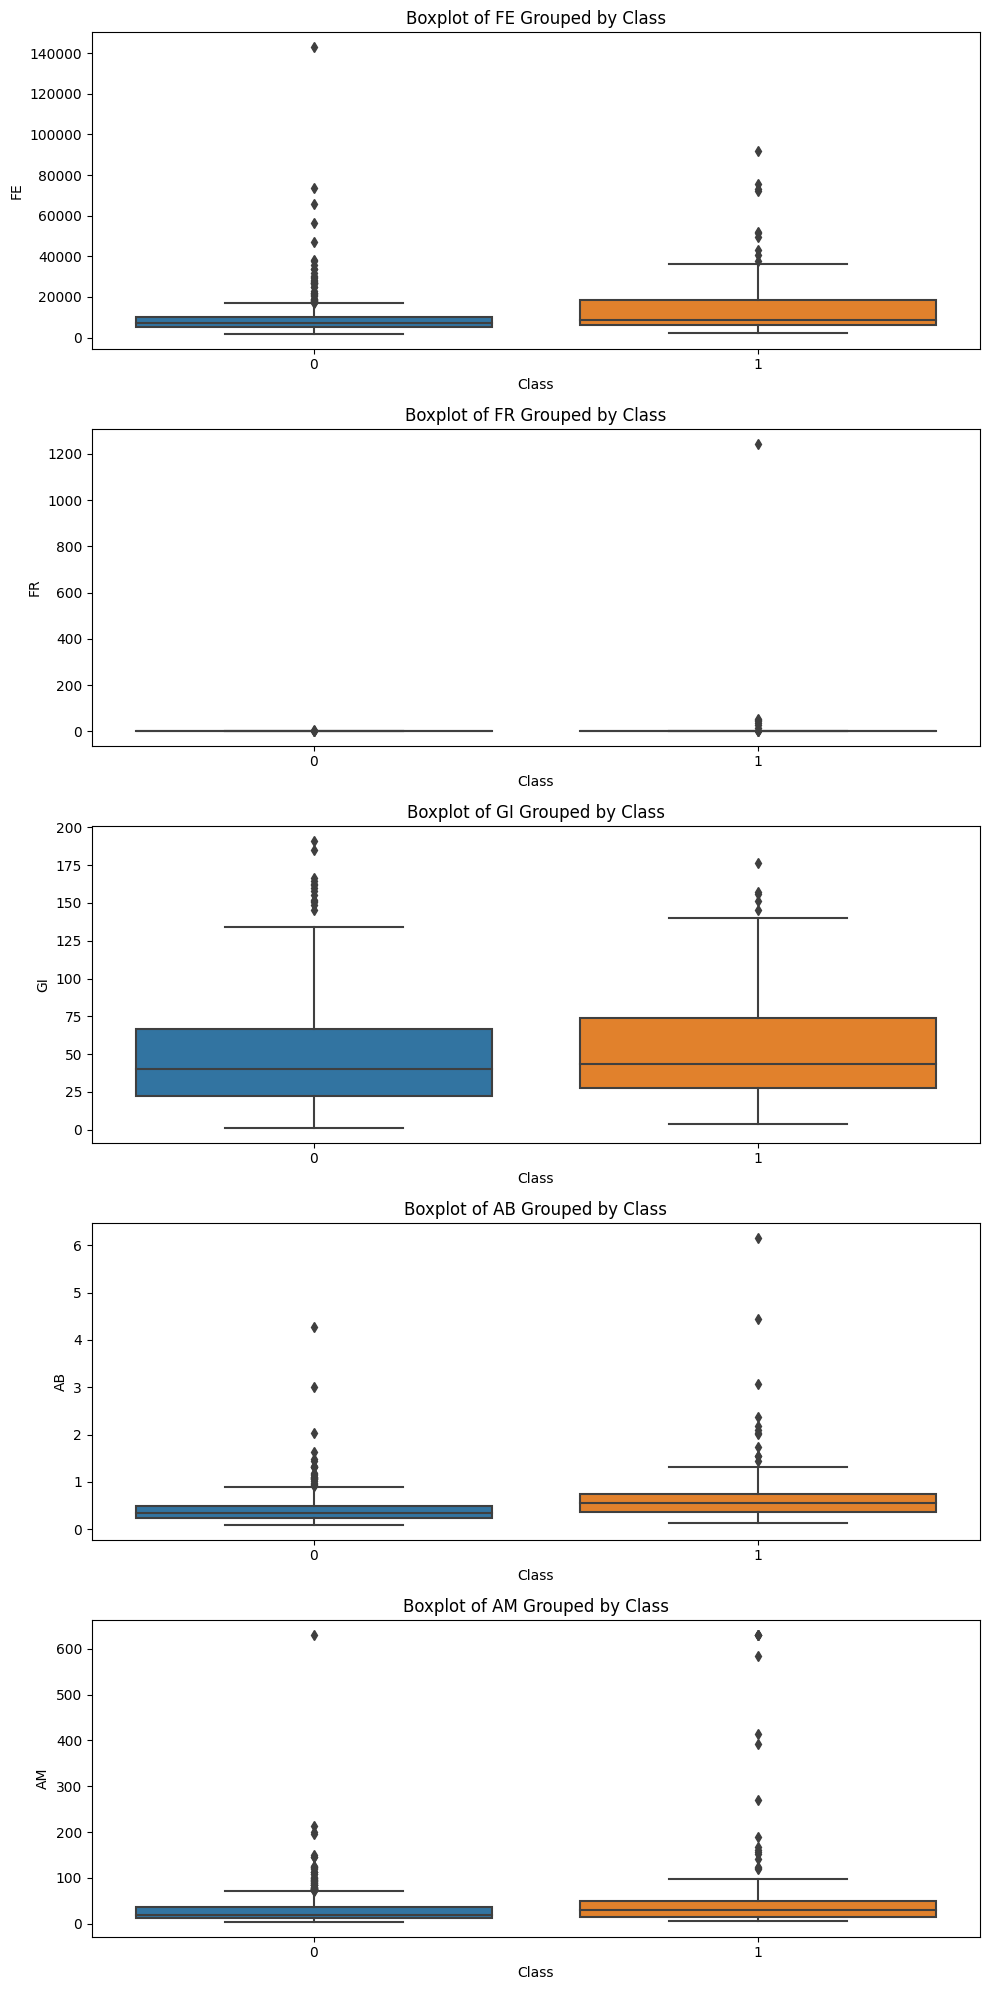

In [13]:
#Let's create boxplots for the same random features we used earlier ('DI', 'BD', 'FL', 'CS', 'AZ').
# Create a subplot of boxplots
fig, axes = plt.subplots(nrows=len(selected_columns), figsize=(10, 20))

for ax, column in zip(axes, selected_columns):
    sns.boxplot(data=data, x='Class', y=column, ax=ax)
    ax.set_title(f"Boxplot of {column} Grouped by Class")

plt.tight_layout()
plt.show()


Here are the boxplots of the selected features ('DI', 'BD', 'FL', 'CS', 'AZ'), grouped by the target variable 'Class':

1. 'DI' Column: The median (indicated by the line within the box) seems slightly higher for class '1' than class '0'. The interquartile range (the height of the box) is similar for both classes. There are several outliers (indicated by the points above the whiskers of the boxplot) in both classes.

2. 'BD' Column: The distribution for class '1' seems to have a higher median and a larger interquartile range than class '0'. There are several outliers in both classes.

3. 'FL' Column: The distribution for class '1' seems to have a lower median than class '0'. The interquartile range is similar for both classes. There are several outliers in both classes.

4. 'CS' Column: The distributions for both classes seem similar, with a similar median and interquartile range. There are several outliers in both classes.

5. 'AZ' Column: The median for class '1' is slightly lower than for class '0'. The interquartile range is similar for both classes. There are several outliers in both classes.

# Data Preprocessing

### Handle Missing Values

Handling missing values is an important step in the data preprocessing pipeline. The method used to handle missing values depends on the nature of the data and the specific columns. Here, we have two main options:

**Imputation**: *Replace the missing values with a calculated value. Common choices for this calculated value are the mean, median, or mode of the column. This is often a good choice if the data is missing at random and the percentage of missing values is relatively low.*

**Deletion**: *Remove rows or columns that contain missing values. This is a good choice if the data is not missing at random, or if a column has a large percentage of missing values. However, this method has the disadvantage of reducing the amount of data available for model training.*


**Given the nature of our dataset, it seems that imputation could be a good option as the percentage of missing values is relatively low for each column. I will replace the missing values with the median of each column. I'm choosing the median because it is less sensitive to outliers than the mean.**

In [14]:
# Fill missing values with the median of each numeric column
numeric_columns = data.select_dtypes(include=[np.number]).columns
train_data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Check if there are still missing values
missing_values_filled = train_data.isnull().sum()

missing_values_filled[missing_values_filled > 0]


Series([], dtype: int64)

### Encode Categorical Variables

*Encoding the categorical variable 'EJ'. As mentioned earlier, most machine learning models require numerical input, so we'll need to convert this column to a numerical format.*

*Here are two common methods for encoding categorical variables:*

**One-Hot Encoding**: *This method converts each category into a new column and assigns a 1 or 0 (True/False) value to the column. This method is suitable for nominal data where no ordering is present.*

**Ordinal Encoding**: *This method converts each category into a unique integer. This method is suitable for ordinal data where an ordering is present.*

*In our case, the 'EJ' column is nominal data (no particular order can be inferred from 'A' and 'B'), so one-hot encoding might be more appropriate. Let's proceed with this.*

In [15]:
# I will use pd.get_dummies() function to perform one-hot encoding on the 'EJ' column.
# Perform one-hot encoding on the 'EJ' column
data_filled = pd.get_dummies(train_data, columns=['EJ'])

# Display the first few rows of the data
data_filled.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class,EJ_A,EJ_B
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.23868,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1,0,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.23868,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0,1,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.23868,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0,0,1
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.23868,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0,0,1
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.23868,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1,0,1


The one-hot encoding has been performed successfully on the 'EJ' column.
As a result, the 'EJ' column has been replaced by two new columns: 'EJ_A' and 'EJ_B'. These columns represent whether the original value was 'A' or 'B', respectively.

Now our dataset is entirely numeric and ready for further preprocessing like scaling or normalization, feature selection

### Scale Numerical Variables

Scaling numerical variables is an important preprocessing step, especially for algorithms that use a distance measure like k-Nearest Neighbors (k-NN) or Support Vector Machines (SVM). Scaling can also speed up the training process for neural networks and gradient descent-based algorithms.

There are two common types of scaling:

**Standardization (Z-score normalization)**: *This method transforms the data to have a mean of 0 and a standard deviation of 1. It is useful when the data follows a Gaussian distribution.*

**Min-Max Scaling (Normalization)**: *This method transforms the data to fall within a specified range, usually (0, 1). It is useful when the data does not follow a Gaussian distribution.*

In our case, we don't know if all numeric data follow a Gaussian distribution. To be on the safe side, we can use Min-Max Scaling.

Also, remember that we should fit the scaler on the training data and then transform both the training and test data to avoid data leakage. However, as we only have one dataset for now, I'll apply the scaling to the entire dataset.

In [42]:

# Define the scaler
scaler = MinMaxScaler()

# List of numerical columns (excluding the target 'Class' and one-hot encoded columns)
num_cols = data_filled.drop(['Id', 'Class', 'EJ_A', 'EJ_B'], axis=1).columns

# Apply the scaler to the numerical columns
data_filled[num_cols] = scaler.fit_transform(data_filled[num_cols])

# Display the first few rows of the scaled data
data_filled.head()


(617, 59)

In [43]:
data_filled.shape

(617, 59)

*The numerical variables have been successfully scaled to fall within the range of 0 to 1 using Min-Max Scaling*

### Handle Class Imbalance

Handling class imbalance can be important in many machine learning problems. Class imbalance refers to a situation where the classes are not represented equally.

In our case, we observed in our exploratory data analysis that the target variable 'Class' is imbalanced, with significantly more instances of class '0' than class '1'. This could potentially lead to a model that is biased towards the majority class, meaning it might perform poorly on the minority class.

There are several strategies to handle class imbalance:

1. Resampling: This involves adding copies of instances from the minority class (oversampling) or deleting instances from the majority class (undersampling) to obtain a balanced dataset.

2. Weighted Classes: Some machine learning algorithms allow you to set class weights, which can make the algorithm pay more attention to the minority class.

3. Use of specific metrics: Using appropriate evaluation metrics that are less sensitive to class imbalance. For instance, precision, recall, F1-score, ROC AUC score can be better metrics than accuracy in imbalanced datasets.

4. Ensemble Methods: Using ensemble methods like bagging and boosting can also help improve the performance on the minority class. For example, the Random Forest algorithm (an ensemble of Decision Trees) can handle imbalance well.

5. Anomaly Detection: If the minority class is very small, you can treat the problem as an anomaly detection problem.

6. Synthetic Minority Over-sampling Technique (SMOTE): This method generates synthetic samples from the minority class.

Before deciding whether we need to handle the class imbalance, we would usually first train a baseline model and see its performance. If the model performs poorly on the minority class, then we might consider using one of the above techniques.

# Feature Engineering and Selection


Feature Engineering and Selection can be an important step in the machine learning pipeline, particularly in cases where you have a large number of features or if you believe that some features may be more informative than others.

Feature Engineering is the process of creating new features or modifying existing ones to improve model performance. This could involve things like creating interaction terms, creating polynomial features, binning variables, or encoding categorical variables. In our case, we've already done some feature engineering by handling missing values and one-hot encoding the 'EJ' column.

Feature Selection is the process of selecting a subset of the original features to use in model training. This can be beneficial when you have a large number of features, as it can reduce overfitting, improve accuracy, and reduce training time. Common methods for feature selection include statistical tests, Recursive Feature Elimination (RFE), Lasso regularization, or using tree-based models to calculate feature importance.

In our current dataset, we have 59 columns after preprocessing, which isn't excessively large. However, not all of these features may be useful for predicting the target variable. Applying feature selection could potentially improve our model's performance.

****for now we can proceed with Modeling and we can do Feature Engineering and Selection later if we found the model it not performing good enough****


In [17]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.7 MB/s eta 0:00:00


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
import optuna

# Load the data
data = data_filled

# Separate features and target
X = data.drop(['Id', 'Class'], axis=1)
y = data['Class']

# Set up a StratifiedKFold for cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    params = {
      #  'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']), # type of model


        'tree_method': 'gpu_hist',
        'max_depth': trial.suggest_int('max_depth', 6, 10), # max depth of each tree
        'scale_pos_weight': trial.suggest_int('scale_pos_weight', 8, 25), # for imbalanced data sets
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
        'n_estimators': trial.suggest_int('n_estimators', 400, 600), # number of trees
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10), # minimum sum of instance weight (hessian) needed in a child
        'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1.0), # subsample ratio of the training instances
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0), # subsample ratio of columns when constructing each tree
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-1, 10), # L1 regularization term on weights
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0), # L2 regularization term on weights
        'eval_metric': 'logloss', # metric used for validation data
        'use_label_encoder': False, # use label encoder for task label
        #############################
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),# control of tree growth
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10),
        'base_score': trial.suggest_float('base_score', 0.1, 1.0),  # if your target variable is binary and between 0 and 1
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1.0),
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.1, 1.0)

    }


    # Fit the model and perform cross-validation
    optuna_model = XGBClassifier(**params)
    scores = cross_val_score(optuna_model, X, y, cv=kfold, scoring='neg_log_loss')

    # Output the average log loss across the folds
    loss = -scores.mean()

    return loss

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the study
study.optimize(objective, n_trials=200,show_progress_bar=True)

# Print the result
best_params = study.best_params
print(f"Best parameters: {best_params}")


[I 2023-07-17 07:26:14,044] A new study created in memory with name: no-name-635889fc-7efa-4132-beb2-450a604bbffb


  0%|          | 0/200 [00:00<?, ?it/s]

<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:26:29,469] Trial 0 finished with value: 0.279397180307221 and parameters: {'max_depth': 8, 'scale_pos_weight': 15, 'learning_rate': 0.013312963024967553, 'n_estimators': 407, 'min_child_weight': 6, 'gamma': 0.0003717838862267594, 'subsample': 0.41217073872509574, 'colsample_bytree': 0.4185310896720101, 'reg_alpha': 3.0155586036564777, 'reg_lambda': 0.00301957569140507, 'grow_policy': 'lossguide', 'max_delta_step': 9, 'base_score': 0.8964748474692825, 'colsample_bylevel': 0.6088123945318697, 'colsample_bynode': 0.7720063591687554}. Best is trial 0 with value: 0.279397180307221.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:26:47,346] Trial 1 finished with value: 0.3731998246390392 and parameters: {'max_depth': 6, 'scale_pos_weight': 16, 'learning_rate': 0.022150867110647964, 'n_estimators': 425, 'min_child_weight': 1, 'gamma': 5.941450506624383e-05, 'subsample': 0.614003306825242, 'colsample_bytree': 0.030305342977674225, 'reg_alpha': 0.2102500371624896, 'reg_lambda': 0.00106096552602168, 'grow_policy': 'lossguide', 'max_delta_step': 8, 'base_score': 0.34632530923697724, 'colsample_bylevel': 0.2410490795960847, 'colsample_bynode': 0.8904707561496463}. Best is trial 0 with value: 0.279397180307221.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:27:02,062] Trial 2 finished with value: 0.21506282828079343 and parameters: {'max_depth': 7, 'scale_pos_weight': 25, 'learning_rate': 0.01993106692340668, 'n_estimators': 513, 'min_child_weight': 4, 'gamma': 1.2827166167774127e-06, 'subsample': 0.5116411652699737, 'colsample_bytree': 0.10849817224969917, 'reg_alpha': 0.19842559000235094, 'reg_lambda': 3.9680541992065004e-05, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.5374233746756674, 'colsample_bylevel': 0.6852945377334849, 'colsample_bynode': 0.8621650838660772}. Best is trial 2 with value: 0.21506282828079343.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:27:11,917] Trial 3 finished with value: 0.525720802702572 and parameters: {'max_depth': 6, 'scale_pos_weight': 25, 'learning_rate': 0.02025180216325439, 'n_estimators': 402, 'min_child_weight': 6, 'gamma': 4.927908621256518e-08, 'subsample': 0.6635042669899188, 'colsample_bytree': 0.025059539981846773, 'reg_alpha': 0.3410635213763118, 'reg_lambda': 0.017255448550691495, 'grow_policy': 'lossguide', 'max_delta_step': 10, 'base_score': 0.407206787821635, 'colsample_bylevel': 0.27954002600237304, 'colsample_bynode': 0.2538463300991849}. Best is trial 2 with value: 0.21506282828079343.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:27:21,897] Trial 4 finished with value: 0.405435943665979 and parameters: {'max_depth': 7, 'scale_pos_weight': 24, 'learning_rate': 0.014268024092310923, 'n_estimators': 425, 'min_child_weight': 5, 'gamma': 1.45691371806919e-07, 'subsample': 0.6435488521765413, 'colsample_bytree': 0.13565750919896566, 'reg_alpha': 7.455976899456397, 'reg_lambda': 0.002585998052279712, 'grow_policy': 'lossguide', 'max_delta_step': 9, 'base_score': 0.5614413822954304, 'colsample_bylevel': 0.7706679353995175, 'colsample_bynode': 0.6748759111934831}. Best is trial 2 with value: 0.21506282828079343.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:27:27,875] Trial 5 finished with value: 0.3057818571126806 and parameters: {'max_depth': 6, 'scale_pos_weight': 9, 'learning_rate': 0.06882160941360467, 'n_estimators': 476, 'min_child_weight': 10, 'gamma': 0.003132443534138075, 'subsample': 0.43298207203761135, 'colsample_bytree': 0.012003514303434876, 'reg_alpha': 3.427896407839635, 'reg_lambda': 0.00022845396019972725, 'grow_policy': 'depthwise', 'max_delta_step': 5, 'base_score': 0.7296810538743129, 'colsample_bylevel': 0.4120173067264067, 'colsample_bynode': 0.7575478893770168}. Best is trial 2 with value: 0.21506282828079343.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:27:38,057] Trial 6 finished with value: 0.3027064370147292 and parameters: {'max_depth': 7, 'scale_pos_weight': 18, 'learning_rate': 0.01136899864741774, 'n_estimators': 473, 'min_child_weight': 3, 'gamma': 6.149492889258414e-05, 'subsample': 0.4377383608059751, 'colsample_bytree': 0.2573005900873775, 'reg_alpha': 1.8576855845790592, 'reg_lambda': 5.746244970616421e-06, 'grow_policy': 'depthwise', 'max_delta_step': 10, 'base_score': 0.22524456333527249, 'colsample_bylevel': 0.3978693922901473, 'colsample_bynode': 0.47400772089288323}. Best is trial 2 with value: 0.21506282828079343.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:27:47,258] Trial 7 finished with value: 0.1956479463261033 and parameters: {'max_depth': 7, 'scale_pos_weight': 15, 'learning_rate': 0.016768187257694328, 'n_estimators': 429, 'min_child_weight': 7, 'gamma': 0.0003940900418506415, 'subsample': 0.850461300752956, 'colsample_bytree': 0.41305197933533777, 'reg_alpha': 0.5703482571819293, 'reg_lambda': 0.016560476505724016, 'grow_policy': 'depthwise', 'max_delta_step': 9, 'base_score': 0.8561447672022419, 'colsample_bylevel': 0.5349210199001296, 'colsample_bynode': 0.891505495582368}. Best is trial 7 with value: 0.1956479463261033.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:27:56,706] Trial 8 finished with value: 0.266234838727375 and parameters: {'max_depth': 6, 'scale_pos_weight': 18, 'learning_rate': 0.07392491264227292, 'n_estimators': 503, 'min_child_weight': 6, 'gamma': 0.0702195804137368, 'subsample': 0.5044610385427043, 'colsample_bytree': 0.013252701473351072, 'reg_alpha': 1.4517619392474246, 'reg_lambda': 0.0032844699470924808, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.26283583188233584, 'colsample_bylevel': 0.8206298236119807, 'colsample_bynode': 0.8311939420453067}. Best is trial 7 with value: 0.1956479463261033.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:28:09,507] Trial 9 finished with value: 0.3807467402437759 and parameters: {'max_depth': 7, 'scale_pos_weight': 24, 'learning_rate': 0.08742915356303038, 'n_estimators': 408, 'min_child_weight': 7, 'gamma': 8.161453774544018e-06, 'subsample': 0.5088328204640838, 'colsample_bytree': 0.022512823555125065, 'reg_alpha': 7.055715147669741, 'reg_lambda': 0.057521327630364466, 'grow_policy': 'lossguide', 'max_delta_step': 9, 'base_score': 0.7625873681438259, 'colsample_bylevel': 0.6056111843588665, 'colsample_bynode': 0.6021184708980438}. Best is trial 7 with value: 0.1956479463261033.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:28:18,601] Trial 10 finished with value: 0.17226265661678444 and parameters: {'max_depth': 10, 'scale_pos_weight': 11, 'learning_rate': 0.037846195959086615, 'n_estimators': 592, 'min_child_weight': 9, 'gamma': 0.002875404650275031, 'subsample': 0.9066199740006528, 'colsample_bytree': 0.7359844070192393, 'reg_alpha': 0.6372236263946602, 'reg_lambda': 0.2651298347674778, 'grow_policy': 'depthwise', 'max_delta_step': 1, 'base_score': 0.984838577138474, 'colsample_bylevel': 0.9554372418396664, 'colsample_bynode': 0.962346655811847}. Best is trial 10 with value: 0.17226265661678444.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:28:27,368] Trial 11 finished with value: 0.18095968067186646 and parameters: {'max_depth': 10, 'scale_pos_weight': 11, 'learning_rate': 0.03975983829922363, 'n_estimators': 592, 'min_child_weight': 9, 'gamma': 0.001984634901163623, 'subsample': 0.9475308997608545, 'colsample_bytree': 0.9998713188820438, 'reg_alpha': 0.6055561560941997, 'reg_lambda': 0.9187351941014136, 'grow_policy': 'depthwise', 'max_delta_step': 0, 'base_score': 0.993070068874504, 'colsample_bylevel': 0.9855906297767485, 'colsample_bynode': 0.9983579986722144}. Best is trial 10 with value: 0.17226265661678444.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:28:36,023] Trial 12 finished with value: 0.18230135423688149 and parameters: {'max_depth': 10, 'scale_pos_weight': 9, 'learning_rate': 0.04316626511604133, 'n_estimators': 596, 'min_child_weight': 10, 'gamma': 0.010233232361244024, 'subsample': 0.9763019977384413, 'colsample_bytree': 0.9983660709985618, 'reg_alpha': 0.7569800636210678, 'reg_lambda': 0.3360947809861489, 'grow_policy': 'depthwise', 'max_delta_step': 0, 'base_score': 0.9767124768201288, 'colsample_bylevel': 0.9884910677188055, 'colsample_bynode': 0.9883600393828652}. Best is trial 10 with value: 0.17226265661678444.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:28:40,455] Trial 13 finished with value: 4.750340655330335 and parameters: {'max_depth': 10, 'scale_pos_weight': 12, 'learning_rate': 0.039534843630093165, 'n_estimators': 596, 'min_child_weight': 9, 'gamma': 0.003683848538338351, 'subsample': 0.9945129166710042, 'colsample_bytree': 0.9807348581430144, 'reg_alpha': 0.45595045506214305, 'reg_lambda': 0.9095242697765538, 'grow_policy': 'depthwise', 'max_delta_step': 0, 'base_score': 0.9968406833682015, 'colsample_bylevel': 0.8779597399635263, 'colsample_bynode': 0.9844276038911886}. Best is trial 10 with value: 0.17226265661678444.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:28:49,442] Trial 14 finished with value: 0.17400460080654123 and parameters: {'max_depth': 9, 'scale_pos_weight': 12, 'learning_rate': 0.030511243322374274, 'n_estimators': 558, 'min_child_weight': 8, 'gamma': 0.06493601455842807, 'subsample': 0.8338977712894539, 'colsample_bytree': 0.5759065786600613, 'reg_alpha': 0.93840868525395, 'reg_lambda': 7.210040763525167e-08, 'grow_policy': 'depthwise', 'max_delta_step': 2, 'base_score': 0.9943188985731404, 'colsample_bylevel': 0.9741802393587293, 'colsample_bynode': 0.9932438493387128}. Best is trial 10 with value: 0.17226265661678444.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:28:59,704] Trial 15 finished with value: 0.1720309158065912 and parameters: {'max_depth': 9, 'scale_pos_weight': 12, 'learning_rate': 0.027690840263687563, 'n_estimators': 556, 'min_child_weight': 8, 'gamma': 0.05358351238395487, 'subsample': 0.8106440022604211, 'colsample_bytree': 0.4612723764461474, 'reg_alpha': 0.10263182328227537, 'reg_lambda': 1.5247773540267616e-08, 'grow_policy': 'depthwise', 'max_delta_step': 2, 'base_score': 0.8122750133009196, 'colsample_bylevel': 0.8773713192898206, 'colsample_bynode': 0.6861158285349958}. Best is trial 15 with value: 0.1720309158065912.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:29:08,852] Trial 16 finished with value: 0.1762225624166121 and parameters: {'max_depth': 9, 'scale_pos_weight': 8, 'learning_rate': 0.028258553565108854, 'n_estimators': 557, 'min_child_weight': 8, 'gamma': 0.017264656019103763, 'subsample': 0.7715498707908394, 'colsample_bytree': 0.21720593687841566, 'reg_alpha': 0.10627671550748198, 'reg_lambda': 4.410545156369377e-08, 'grow_policy': 'depthwise', 'max_delta_step': 2, 'base_score': 0.8046679573135457, 'colsample_bylevel': 0.854491313977736, 'colsample_bynode': 0.4492855828105765}. Best is trial 15 with value: 0.1720309158065912.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:29:16,719] Trial 17 finished with value: 0.17373130068514503 and parameters: {'max_depth': 9, 'scale_pos_weight': 13, 'learning_rate': 0.05158505998480174, 'n_estimators': 550, 'min_child_weight': 8, 'gamma': 0.04758295077735284, 'subsample': 0.7467281423775889, 'colsample_bytree': 0.5295769257718226, 'reg_alpha': 0.1030106551409981, 'reg_lambda': 7.2752876768051355e-06, 'grow_policy': 'depthwise', 'max_delta_step': 2, 'base_score': 0.6911044636878103, 'colsample_bylevel': 0.7290709319557936, 'colsample_bynode': 0.6451351294787344}. Best is trial 15 with value: 0.1720309158065912.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:29:25,979] Trial 18 finished with value: 0.1789304194727611 and parameters: {'max_depth': 9, 'scale_pos_weight': 10, 'learning_rate': 0.027288348515415867, 'n_estimators': 532, 'min_child_weight': 9, 'gamma': 0.0008225703262352204, 'subsample': 0.8678056072827599, 'colsample_bytree': 0.2665402137829663, 'reg_alpha': 0.2790621763882038, 'reg_lambda': 4.694162025197704e-07, 'grow_policy': 'depthwise', 'max_delta_step': 3, 'base_score': 0.836364529373862, 'colsample_bylevel': 0.8783647464089792, 'colsample_bynode': 0.7231431405038007}. Best is trial 15 with value: 0.1720309158065912.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:29:35,679] Trial 19 finished with value: 0.2230169261384038 and parameters: {'max_depth': 8, 'scale_pos_weight': 21, 'learning_rate': 0.05460880277856476, 'n_estimators': 569, 'min_child_weight': 10, 'gamma': 0.014692167612116079, 'subsample': 0.7540773206161625, 'colsample_bytree': 0.06616591272348357, 'reg_alpha': 0.15852203496244194, 'reg_lambda': 1.2877120432520394e-08, 'grow_policy': 'depthwise', 'max_delta_step': 1, 'base_score': 0.6527313571809555, 'colsample_bylevel': 0.12687861107800746, 'colsample_bynode': 0.5734918414153606}. Best is trial 15 with value: 0.1720309158065912.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:29:45,277] Trial 20 finished with value: 0.16322964877471954 and parameters: {'max_depth': 10, 'scale_pos_weight': 13, 'learning_rate': 0.03466551220943045, 'n_estimators': 578, 'min_child_weight': 7, 'gamma': 0.0122832971434219, 'subsample': 0.9014763767983123, 'colsample_bytree': 0.5489287921918099, 'reg_alpha': 0.39541298280400505, 'reg_lambda': 4.92858070640749e-07, 'grow_policy': 'depthwise', 'max_delta_step': 4, 'base_score': 0.8982691001599269, 'colsample_bylevel': 0.9042763235885494, 'colsample_bynode': 0.7995747938709914}. Best is trial 20 with value: 0.16322964877471954.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:29:54,635] Trial 21 finished with value: 0.16740144505587062 and parameters: {'max_depth': 10, 'scale_pos_weight': 14, 'learning_rate': 0.03459639046510148, 'n_estimators': 578, 'min_child_weight': 7, 'gamma': 0.09440064334351149, 'subsample': 0.9094832624633202, 'colsample_bytree': 0.5662884263846717, 'reg_alpha': 0.38990513833925544, 'reg_lambda': 4.90544393263908e-07, 'grow_policy': 'depthwise', 'max_delta_step': 4, 'base_score': 0.8953903710907967, 'colsample_bylevel': 0.9072900560071859, 'colsample_bynode': 0.824001900082109}. Best is trial 20 with value: 0.16322964877471954.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:30:04,906] Trial 22 finished with value: 0.1665203836885612 and parameters: {'max_depth': 10, 'scale_pos_weight': 14, 'learning_rate': 0.025127508177398075, 'n_estimators': 572, 'min_child_weight': 7, 'gamma': 0.0998138395918474, 'subsample': 0.9197851584899952, 'colsample_bytree': 0.35777481399077343, 'reg_alpha': 0.3762288576487494, 'reg_lambda': 3.762169897515797e-07, 'grow_policy': 'depthwise', 'max_delta_step': 6, 'base_score': 0.8751825315707448, 'colsample_bylevel': 0.7929319528268215, 'colsample_bynode': 0.7651049246922084}. Best is trial 20 with value: 0.16322964877471954.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:30:15,115] Trial 23 finished with value: 0.1590309824185414 and parameters: {'max_depth': 10, 'scale_pos_weight': 14, 'learning_rate': 0.03346114004753726, 'n_estimators': 577, 'min_child_weight': 5, 'gamma': 0.0778028900919549, 'subsample': 0.9519270659915157, 'colsample_bytree': 0.3042911141238551, 'reg_alpha': 0.39434007531023074, 'reg_lambda': 4.893870841267867e-07, 'grow_policy': 'depthwise', 'max_delta_step': 6, 'base_score': 0.925997054085374, 'colsample_bylevel': 0.7631594530889776, 'colsample_bynode': 0.8230496363180919}. Best is trial 23 with value: 0.1590309824185414.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:30:26,492] Trial 24 finished with value: 0.1536094713433661 and parameters: {'max_depth': 10, 'scale_pos_weight': 18, 'learning_rate': 0.02435602520417492, 'n_estimators': 532, 'min_child_weight': 4, 'gamma': 0.008904873319273844, 'subsample': 0.9995212449978902, 'colsample_bytree': 0.2995638455592738, 'reg_alpha': 0.2992115629621575, 'reg_lambda': 5.620543993546036e-07, 'grow_policy': 'depthwise', 'max_delta_step': 6, 'base_score': 0.897730458847293, 'colsample_bylevel': 0.7856227689043226, 'colsample_bynode': 0.7694047897276858}. Best is trial 24 with value: 0.1536094713433661.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:30:38,093] Trial 25 finished with value: 0.1533513078978876 and parameters: {'max_depth': 10, 'scale_pos_weight': 19, 'learning_rate': 0.03216243126627592, 'n_estimators': 536, 'min_child_weight': 3, 'gamma': 0.022945682844404517, 'subsample': 0.9730121494998634, 'colsample_bytree': 0.18366277474975434, 'reg_alpha': 0.28195886964427636, 'reg_lambda': 1.3382687745089433e-06, 'grow_policy': 'depthwise', 'max_delta_step': 7, 'base_score': 0.8974123738614385, 'colsample_bylevel': 0.7325901723744801, 'colsample_bynode': 0.8028396534144346}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:30:51,189] Trial 26 finished with value: 0.16614992612049137 and parameters: {'max_depth': 9, 'scale_pos_weight': 20, 'learning_rate': 0.0238751075757284, 'n_estimators': 533, 'min_child_weight': 3, 'gamma': 0.015756373019068674, 'subsample': 0.9696600255071885, 'colsample_bytree': 0.17690595032135586, 'reg_alpha': 0.24795849458504024, 'reg_lambda': 2.42431196541616e-06, 'grow_policy': 'depthwise', 'max_delta_step': 7, 'base_score': 0.10401933687330495, 'colsample_bylevel': 0.7185897157632625, 'colsample_bynode': 0.7123767572511835}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:31:02,732] Trial 27 finished with value: 0.1542240328515872 and parameters: {'max_depth': 10, 'scale_pos_weight': 20, 'learning_rate': 0.03309852578910316, 'n_estimators': 539, 'min_child_weight': 2, 'gamma': 0.0009421622914008218, 'subsample': 0.863549830745024, 'colsample_bytree': 0.31723898299895237, 'reg_alpha': 0.2755619523043454, 'reg_lambda': 3.1568732488449046e-05, 'grow_policy': 'depthwise', 'max_delta_step': 7, 'base_score': 0.766351694091852, 'colsample_bylevel': 0.7809530161568085, 'colsample_bynode': 0.8939055044328146}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:31:18,703] Trial 28 finished with value: 0.15892760975681267 and parameters: {'max_depth': 8, 'scale_pos_weight': 20, 'learning_rate': 0.01828536206519128, 'n_estimators': 531, 'min_child_weight': 1, 'gamma': 0.0009747114022067484, 'subsample': 0.9911345358049998, 'colsample_bytree': 0.16389563748107777, 'reg_alpha': 0.15533287011703706, 'reg_lambda': 2.3760270934474606e-05, 'grow_policy': 'depthwise', 'max_delta_step': 7, 'base_score': 0.7580200245614755, 'colsample_bylevel': 0.6767167136267964, 'colsample_bynode': 0.9084171132002635}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:31:30,512] Trial 29 finished with value: 0.15949240473782025 and parameters: {'max_depth': 9, 'scale_pos_weight': 22, 'learning_rate': 0.022364679012357235, 'n_estimators': 481, 'min_child_weight': 2, 'gamma': 0.0006748806290242261, 'subsample': 0.8705415681358509, 'colsample_bytree': 0.33632043857971916, 'reg_alpha': 0.28179418413314433, 'reg_lambda': 9.647398806806629e-05, 'grow_policy': 'depthwise', 'max_delta_step': 7, 'base_score': 0.9328591089677258, 'colsample_bylevel': 0.8279495039502567, 'colsample_bynode': 0.7641150184034456}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:31:42,016] Trial 30 finished with value: 0.15703710475639865 and parameters: {'max_depth': 10, 'scale_pos_weight': 18, 'learning_rate': 0.03148765945236663, 'n_estimators': 516, 'min_child_weight': 3, 'gamma': 0.00010800178377440174, 'subsample': 0.8051259795882011, 'colsample_bytree': 0.21034418023164644, 'reg_alpha': 0.5093073931113538, 'reg_lambda': 2.519589473929328e-06, 'grow_policy': 'depthwise', 'max_delta_step': 8, 'base_score': 0.8072918398991994, 'colsample_bylevel': 0.6222029326761478, 'colsample_bynode': 0.9254868231369735}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:31:53,815] Trial 31 finished with value: 0.16243934193929674 and parameters: {'max_depth': 10, 'scale_pos_weight': 18, 'learning_rate': 0.03031543272466424, 'n_estimators': 514, 'min_child_weight': 3, 'gamma': 0.0001772148771384621, 'subsample': 0.8180374457731654, 'colsample_bytree': 0.19697145494841198, 'reg_alpha': 0.5046580784082142, 'reg_lambda': 1.930324739809257e-06, 'grow_policy': 'depthwise', 'max_delta_step': 8, 'base_score': 0.8208214556375595, 'colsample_bylevel': 0.6357017403651054, 'colsample_bynode': 0.9232428017499777}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:32:07,070] Trial 32 finished with value: 0.15680990056581073 and parameters: {'max_depth': 10, 'scale_pos_weight': 19, 'learning_rate': 0.025182580382968316, 'n_estimators': 544, 'min_child_weight': 2, 'gamma': 0.00024793514211392584, 'subsample': 0.8901836684179869, 'colsample_bytree': 0.24314450381364613, 'reg_alpha': 0.2924938094391169, 'reg_lambda': 1.8918232305533063e-05, 'grow_policy': 'depthwise', 'max_delta_step': 8, 'base_score': 0.781763834867805, 'colsample_bylevel': 0.754276382419786, 'colsample_bynode': 0.8835856252555889}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:32:21,634] Trial 33 finished with value: 0.17276936919720562 and parameters: {'max_depth': 10, 'scale_pos_weight': 17, 'learning_rate': 0.024529005383021985, 'n_estimators': 542, 'min_child_weight': 2, 'gamma': 0.00026702580985757873, 'subsample': 0.9966837346827427, 'colsample_bytree': 0.11479193611762335, 'reg_alpha': 0.20711485439643904, 'reg_lambda': 2.1690334017354825e-05, 'grow_policy': 'depthwise', 'max_delta_step': 8, 'base_score': 0.9102366973182457, 'colsample_bylevel': 0.7375310166722591, 'colsample_bynode': 0.8786781375020185}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:32:39,649] Trial 34 finished with value: 0.20414410297380975 and parameters: {'max_depth': 9, 'scale_pos_weight': 20, 'learning_rate': 0.021820601607783336, 'n_estimators': 492, 'min_child_weight': 4, 'gamma': 0.0013949075705276613, 'subsample': 0.8839013072722214, 'colsample_bytree': 0.08174092735619964, 'reg_alpha': 0.31336913388228765, 'reg_lambda': 0.00025459114589304485, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.6405875889958519, 'colsample_bylevel': 0.7950636445735222, 'colsample_bynode': 0.8543239210469756}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:32:59,060] Trial 35 finished with value: 0.15920590704286686 and parameters: {'max_depth': 10, 'scale_pos_weight': 22, 'learning_rate': 0.01899635846148356, 'n_estimators': 542, 'min_child_weight': 2, 'gamma': 0.0058133276244131254, 'subsample': 0.9190157814366184, 'colsample_bytree': 0.2661391049859295, 'reg_alpha': 0.25149177910281806, 'reg_lambda': 4.0861432729490716e-05, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.8632237102273769, 'colsample_bylevel': 0.7026032517699077, 'colsample_bynode': 0.8621264889123492}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:33:13,404] Trial 36 finished with value: 0.1623565524127509 and parameters: {'max_depth': 9, 'scale_pos_weight': 16, 'learning_rate': 0.025260112559645862, 'n_estimators': 521, 'min_child_weight': 1, 'gamma': 0.00043306854084595206, 'subsample': 0.7119873089646926, 'colsample_bytree': 0.12967988077396936, 'reg_alpha': 0.18607600154064066, 'reg_lambda': 9.981530543506768e-06, 'grow_policy': 'depthwise', 'max_delta_step': 7, 'base_score': 0.7418761481253326, 'colsample_bylevel': 0.7622656894852716, 'colsample_bynode': 0.7757723550638308}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:33:24,866] Trial 37 finished with value: 0.16232079808059885 and parameters: {'max_depth': 10, 'scale_pos_weight': 19, 'learning_rate': 0.020849660863761825, 'n_estimators': 505, 'min_child_weight': 4, 'gamma': 0.004979268399841553, 'subsample': 0.8645257796429495, 'colsample_bytree': 0.35417449666783923, 'reg_alpha': 0.32382038085545783, 'reg_lambda': 6.5376760468206e-05, 'grow_policy': 'depthwise', 'max_delta_step': 5, 'base_score': 0.7793777319503546, 'colsample_bylevel': 0.8129899437429267, 'colsample_bynode': 0.9190599373914883}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:33:48,381] Trial 38 finished with value: 0.18857824865443903 and parameters: {'max_depth': 10, 'scale_pos_weight': 22, 'learning_rate': 0.015805830729293615, 'n_estimators': 449, 'min_child_weight': 2, 'gamma': 2.9232102865015836e-05, 'subsample': 0.9428772507531163, 'colsample_bytree': 0.15355193308903234, 'reg_alpha': 0.23105121137697818, 'reg_lambda': 0.0002918720212074727, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.698603834385666, 'colsample_bylevel': 0.6643458981756047, 'colsample_bynode': 0.7244445278929614}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:34:00,883] Trial 39 finished with value: 0.16775903741766418 and parameters: {'max_depth': 9, 'scale_pos_weight': 16, 'learning_rate': 0.019758474443963624, 'n_estimators': 526, 'min_child_weight': 4, 'gamma': 0.00191646716490285, 'subsample': 0.8412296318545545, 'colsample_bytree': 0.23681871851582692, 'reg_alpha': 0.1559275353317972, 'reg_lambda': 1.5322083119944965e-05, 'grow_policy': 'depthwise', 'max_delta_step': 10, 'base_score': 0.8502583444750507, 'colsample_bylevel': 0.5582183656350345, 'colsample_bynode': 0.8017778145329042}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:34:11,348] Trial 40 finished with value: 0.16098166679147055 and parameters: {'max_depth': 8, 'scale_pos_weight': 19, 'learning_rate': 0.027582609127383122, 'n_estimators': 543, 'min_child_weight': 5, 'gamma': 0.0005218506076440912, 'subsample': 0.9396153138020583, 'colsample_bytree': 0.4143058604558044, 'reg_alpha': 0.7888108937349525, 'reg_lambda': 3.996540630964785e-06, 'grow_policy': 'depthwise', 'max_delta_step': 9, 'base_score': 0.5639033017733158, 'colsample_bylevel': 0.7550183280059372, 'colsample_bynode': 0.8563776195030929}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:34:22,724] Trial 41 finished with value: 0.16036100834576095 and parameters: {'max_depth': 10, 'scale_pos_weight': 17, 'learning_rate': 0.03100409056121412, 'n_estimators': 514, 'min_child_weight': 3, 'gamma': 0.00011855018831851175, 'subsample': 0.8009277691117342, 'colsample_bytree': 0.19378792347957402, 'reg_alpha': 0.3170730939070231, 'reg_lambda': 2.178465261141934e-06, 'grow_policy': 'depthwise', 'max_delta_step': 8, 'base_score': 0.8054760559838772, 'colsample_bylevel': 0.6941168323086747, 'colsample_bynode': 0.9407431554322755}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:34:33,550] Trial 42 finished with value: 0.16182186630778567 and parameters: {'max_depth': 10, 'scale_pos_weight': 19, 'learning_rate': 0.03233817921454779, 'n_estimators': 500, 'min_child_weight': 3, 'gamma': 0.00012454570745924488, 'subsample': 0.8860676207093299, 'colsample_bytree': 0.23089528413553412, 'reg_alpha': 0.46748970295741815, 'reg_lambda': 9.134869146745898e-06, 'grow_policy': 'depthwise', 'max_delta_step': 8, 'base_score': 0.777151363393185, 'colsample_bylevel': 0.6272204914390465, 'colsample_bynode': 0.9259281477310743}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:34:46,760] Trial 43 finished with value: 0.16094811409530058 and parameters: {'max_depth': 10, 'scale_pos_weight': 18, 'learning_rate': 0.023010768744922843, 'n_estimators': 491, 'min_child_weight': 1, 'gamma': 5.282430334072107e-05, 'subsample': 0.7980002468775705, 'colsample_bytree': 0.31705201578187614, 'reg_alpha': 0.46257667634494753, 'reg_lambda': 1.5157926073815425e-06, 'grow_policy': 'depthwise', 'max_delta_step': 7, 'base_score': 0.9310002531987946, 'colsample_bylevel': 0.6538746701951259, 'colsample_bynode': 0.8869850305661229}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:34:56,753] Trial 44 finished with value: 0.164399095229112 and parameters: {'max_depth': 10, 'scale_pos_weight': 21, 'learning_rate': 0.04371429491619658, 'n_estimators': 521, 'min_child_weight': 4, 'gamma': 0.0012774439626515664, 'subsample': 0.8436547164064813, 'colsample_bytree': 0.14267553325770604, 'reg_alpha': 0.6212869654665748, 'reg_lambda': 4.485162159807069e-05, 'grow_policy': 'depthwise', 'max_delta_step': 9, 'base_score': 0.8549137594067997, 'colsample_bylevel': 0.5878863167001451, 'colsample_bynode': 0.9444726748298888}. Best is trial 25 with value: 0.1533513078978876.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:35:12,451] Trial 45 finished with value: 0.15298701955787622 and parameters: {'max_depth': 10, 'scale_pos_weight': 17, 'learning_rate': 0.035916208347433906, 'n_estimators': 539, 'min_child_weight': 2, 'gamma': 2.284312622070551e-05, 'subsample': 0.9458705908926397, 'colsample_bytree': 0.1965505521743507, 'reg_alpha': 0.20406398966773714, 'reg_lambda': 4.034205820324857e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.7184000355688532, 'colsample_bylevel': 0.7115568306191655, 'colsample_bynode': 0.8328406408266428}. Best is trial 45 with value: 0.15298701955787622.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:35:26,454] Trial 46 finished with value: 0.1518449179700654 and parameters: {'max_depth': 10, 'scale_pos_weight': 17, 'learning_rate': 0.03637733049996407, 'n_estimators': 565, 'min_child_weight': 2, 'gamma': 6.332998380260899e-06, 'subsample': 0.9480932869364069, 'colsample_bytree': 0.2662247934710663, 'reg_alpha': 0.19133561341119185, 'reg_lambda': 1.987218776713346e-05, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.7307009459802819, 'colsample_bylevel': 0.7875140436122184, 'colsample_bynode': 0.8396706344920147}. Best is trial 46 with value: 0.1518449179700654.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:35:43,134] Trial 47 finished with value: 0.15268331982605862 and parameters: {'max_depth': 9, 'scale_pos_weight': 17, 'learning_rate': 0.0368908874515379, 'n_estimators': 560, 'min_child_weight': 1, 'gamma': 1.0677845324579384e-05, 'subsample': 0.9547202045122566, 'colsample_bytree': 0.17326918550707315, 'reg_alpha': 0.1929339604709641, 'reg_lambda': 4.814957264113243e-06, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.7259581550930057, 'colsample_bylevel': 0.802942609799044, 'colsample_bynode': 0.7897495330833096}. Best is trial 46 with value: 0.1518449179700654.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:36:02,243] Trial 48 finished with value: 0.1667979457933611 and parameters: {'max_depth': 9, 'scale_pos_weight': 15, 'learning_rate': 0.03547772952543167, 'n_estimators': 564, 'min_child_weight': 1, 'gamma': 4.168528464004942e-06, 'subsample': 0.9472272282942763, 'colsample_bytree': 0.10009540233559798, 'reg_alpha': 0.1929480913221895, 'reg_lambda': 1.07485679630829e-06, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.7238076892223777, 'colsample_bylevel': 0.8263256112842612, 'colsample_bynode': 0.8173824393704482}. Best is trial 46 with value: 0.1518449179700654.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:36:19,642] Trial 49 finished with value: 0.16409783356473343 and parameters: {'max_depth': 9, 'scale_pos_weight': 17, 'learning_rate': 0.038320890987398805, 'n_estimators': 584, 'min_child_weight': 1, 'gamma': 1.3112710365917711e-05, 'subsample': 0.9711049695352828, 'colsample_bytree': 0.16875771345895385, 'reg_alpha': 0.14265825511872873, 'reg_lambda': 5.670022043562541e-06, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.626292987361984, 'colsample_bylevel': 0.7069759307670427, 'colsample_bynode': 0.6508994018453764}. Best is trial 46 with value: 0.1518449179700654.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:36:33,538] Trial 50 finished with value: 0.15724529658981176 and parameters: {'max_depth': 9, 'scale_pos_weight': 15, 'learning_rate': 0.04215921694676986, 'n_estimators': 562, 'min_child_weight': 2, 'gamma': 1.4432300912122997e-06, 'subsample': 0.9882331890955498, 'colsample_bytree': 0.129550380867029, 'reg_alpha': 0.12364137336527001, 'reg_lambda': 1.3248698795002108e-07, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.9523948039492353, 'colsample_bylevel': 0.9406587765846344, 'colsample_bynode': 0.739694112554459}. Best is trial 46 with value: 0.1518449179700654.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:36:47,261] Trial 51 finished with value: 0.14790222191060762 and parameters: {'max_depth': 10, 'scale_pos_weight': 17, 'learning_rate': 0.03624366904288333, 'n_estimators': 549, 'min_child_weight': 2, 'gamma': 2.0669033445449777e-05, 'subsample': 0.9278202034712424, 'colsample_bytree': 0.29579080883664066, 'reg_alpha': 0.22132807313873595, 'reg_lambda': 4.602881795634414e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.7040349842654557, 'colsample_bylevel': 0.7794213963192812, 'colsample_bynode': 0.7896709432618201}. Best is trial 51 with value: 0.14790222191060762.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:36:59,650] Trial 52 finished with value: 0.15265280779759832 and parameters: {'max_depth': 10, 'scale_pos_weight': 17, 'learning_rate': 0.03753953678371008, 'n_estimators': 552, 'min_child_weight': 3, 'gamma': 2.2719039208916452e-05, 'subsample': 0.9325438296223926, 'colsample_bytree': 0.2710096975091286, 'reg_alpha': 0.21307079578464777, 'reg_lambda': 3.4560316934929843e-06, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.7196656018576333, 'colsample_bylevel': 0.8425079233387618, 'colsample_bynode': 0.7907096703252828}. Best is trial 51 with value: 0.14790222191060762.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:37:14,893] Trial 53 finished with value: 0.15502200743462755 and parameters: {'max_depth': 10, 'scale_pos_weight': 17, 'learning_rate': 0.04682797692824737, 'n_estimators': 552, 'min_child_weight': 1, 'gamma': 1.4425242029312834e-05, 'subsample': 0.9316649821151919, 'colsample_bytree': 0.19183521685722293, 'reg_alpha': 0.20859606493138422, 'reg_lambda': 3.9907401966162125e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.7032562149369431, 'colsample_bylevel': 0.8492123329141378, 'colsample_bynode': 0.7946608059578707}. Best is trial 51 with value: 0.14790222191060762.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:37:27,689] Trial 54 finished with value: 0.1546269327748688 and parameters: {'max_depth': 10, 'scale_pos_weight': 16, 'learning_rate': 0.037042844675076014, 'n_estimators': 552, 'min_child_weight': 3, 'gamma': 2.9652646830010408e-05, 'subsample': 0.9117964933577417, 'colsample_bytree': 0.25235316827213283, 'reg_alpha': 0.13693613901673274, 'reg_lambda': 6.965022771450504e-06, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.6711568360923328, 'colsample_bylevel': 0.7222726333878179, 'colsample_bynode': 0.8324210049615459}. Best is trial 51 with value: 0.14790222191060762.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:37:41,280] Trial 55 finished with value: 0.153016887283973 and parameters: {'max_depth': 7, 'scale_pos_weight': 16, 'learning_rate': 0.03899475607209751, 'n_estimators': 568, 'min_child_weight': 2, 'gamma': 4.4662315309657145e-06, 'subsample': 0.9578891775557492, 'colsample_bytree': 0.1734622010254039, 'reg_alpha': 0.1954223079076768, 'reg_lambda': 1.0562781499097303e-06, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.7288791331397988, 'colsample_bylevel': 0.8533382487832888, 'colsample_bynode': 0.6794461447674977}. Best is trial 51 with value: 0.14790222191060762.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:37:53,361] Trial 56 finished with value: 0.15864673084061748 and parameters: {'max_depth': 7, 'scale_pos_weight': 16, 'learning_rate': 0.040242397303631085, 'n_estimators': 588, 'min_child_weight': 2, 'gamma': 4.246097818587112e-06, 'subsample': 0.9061458883665514, 'colsample_bytree': 0.40359943037475415, 'reg_alpha': 0.17025209877399, 'reg_lambda': 9.501081131030184e-06, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.7251696700046073, 'colsample_bylevel': 0.8491996470590771, 'colsample_bynode': 0.6858314481805564}. Best is trial 51 with value: 0.14790222191060762.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:38:06,566] Trial 57 finished with value: 0.1452483011528748 and parameters: {'max_depth': 6, 'scale_pos_weight': 17, 'learning_rate': 0.036587108764263576, 'n_estimators': 567, 'min_child_weight': 2, 'gamma': 5.301744823903919e-06, 'subsample': 0.9452086442195236, 'colsample_bytree': 0.1483405500441058, 'reg_alpha': 0.1260302541766742, 'reg_lambda': 3.7982453506799424e-06, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.6212832330164808, 'colsample_bylevel': 0.9062443758727229, 'colsample_bynode': 0.7019741222499667}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:38:20,858] Trial 58 finished with value: 0.15252371715533483 and parameters: {'max_depth': 8, 'scale_pos_weight': 17, 'learning_rate': 0.03600670028762206, 'n_estimators': 562, 'min_child_weight': 1, 'gamma': 1.377862339224396e-05, 'subsample': 0.8514710490145005, 'colsample_bytree': 0.27353110811517417, 'reg_alpha': 0.23073827455611293, 'reg_lambda': 4.562241130175338e-06, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.612624357777339, 'colsample_bylevel': 0.9350804843080963, 'colsample_bynode': 0.7257165222042167}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:38:31,208] Trial 59 finished with value: 0.158743251196589 and parameters: {'max_depth': 6, 'scale_pos_weight': 15, 'learning_rate': 0.046160884239187426, 'n_estimators': 573, 'min_child_weight': 2, 'gamma': 5.0785631771329806e-05, 'subsample': 0.8370705441654973, 'colsample_bytree': 0.45324654829277794, 'reg_alpha': 0.13861278742220523, 'reg_lambda': 1.0652558813034848e-05, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.5864775589509336, 'colsample_bylevel': 0.9340752393580487, 'colsample_bynode': 0.7328466926572448}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:38:42,530] Trial 60 finished with value: 0.15538391239703545 and parameters: {'max_depth': 6, 'scale_pos_weight': 18, 'learning_rate': 0.05167260054092305, 'n_estimators': 562, 'min_child_weight': 1, 'gamma': 9.515820134754108e-06, 'subsample': 0.8879542875067395, 'colsample_bytree': 0.27821652912706885, 'reg_alpha': 0.11775757795164879, 'reg_lambda': 1.587913566795062e-05, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.49401490815795146, 'colsample_bylevel': 0.9886255298476645, 'colsample_bynode': 0.7012677699233458}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:38:57,567] Trial 61 finished with value: 0.15129502961220215 and parameters: {'max_depth': 8, 'scale_pos_weight': 17, 'learning_rate': 0.036161818382085785, 'n_estimators': 583, 'min_child_weight': 1, 'gamma': 2.057356196013155e-05, 'subsample': 0.9298973198377073, 'colsample_bytree': 0.22810467848270857, 'reg_alpha': 0.17426756102517085, 'reg_lambda': 4.2048071556122004e-06, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.6695323940711984, 'colsample_bylevel': 0.9043687907610911, 'colsample_bynode': 0.7444256584536275}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:39:13,180] Trial 62 finished with value: 0.15349124017998184 and parameters: {'max_depth': 8, 'scale_pos_weight': 17, 'learning_rate': 0.03492761047107718, 'n_estimators': 583, 'min_child_weight': 1, 'gamma': 7.533287719182794e-06, 'subsample': 0.9200321625758943, 'colsample_bytree': 0.22244030684151966, 'reg_alpha': 0.1681450901235374, 'reg_lambda': 4.098082794072032e-06, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.6736574670208705, 'colsample_bylevel': 0.8967096682516081, 'colsample_bynode': 0.7509877136072061}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:39:27,019] Trial 63 finished with value: 0.15412805501225774 and parameters: {'max_depth': 8, 'scale_pos_weight': 15, 'learning_rate': 0.037132330290080576, 'n_estimators': 549, 'min_child_weight': 1, 'gamma': 2.0816760373346208e-05, 'subsample': 0.8672948516794552, 'colsample_bytree': 0.2808423605104223, 'reg_alpha': 0.2283470201930896, 'reg_lambda': 9.448100031682904e-07, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.605192288759697, 'colsample_bylevel': 0.924454805109537, 'colsample_bynode': 0.6471663801828774}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:39:43,249] Trial 64 finished with value: 0.1503115606712464 and parameters: {'max_depth': 8, 'scale_pos_weight': 16, 'learning_rate': 0.028978722445914012, 'n_estimators': 598, 'min_child_weight': 1, 'gamma': 1.4190285414104082e-06, 'subsample': 0.9267897009733972, 'colsample_bytree': 0.3630066201998089, 'reg_alpha': 0.17397968871590028, 'reg_lambda': 2.803844622019629e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.623048905649546, 'colsample_bylevel': 0.9600333439993598, 'colsample_bynode': 0.7882752648287314}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:39:59,258] Trial 65 finished with value: 0.1525182749605257 and parameters: {'max_depth': 8, 'scale_pos_weight': 16, 'learning_rate': 0.028881845006458705, 'n_estimators': 600, 'min_child_weight': 1, 'gamma': 1.6329242903171561e-06, 'subsample': 0.8958351477621644, 'colsample_bytree': 0.36427843575716035, 'reg_alpha': 0.12164863899929669, 'reg_lambda': 2.463029893407432e-07, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.6660240794691014, 'colsample_bylevel': 0.9450628123669365, 'colsample_bynode': 0.7429552597068503}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:40:14,777] Trial 66 finished with value: 0.15519360230517934 and parameters: {'max_depth': 8, 'scale_pos_weight': 14, 'learning_rate': 0.02940090353540034, 'n_estimators': 600, 'min_child_weight': 1, 'gamma': 1.248938160774823e-06, 'subsample': 0.8901655843779525, 'colsample_bytree': 0.3744514166342075, 'reg_alpha': 0.11700565591482055, 'reg_lambda': 1.8791960540392582e-07, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.6305547713116124, 'colsample_bylevel': 0.9581742430325141, 'colsample_bynode': 0.7449970151559528}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:40:28,874] Trial 67 finished with value: 0.16119437653146457 and parameters: {'max_depth': 8, 'scale_pos_weight': 13, 'learning_rate': 0.03258039575787987, 'n_estimators': 589, 'min_child_weight': 1, 'gamma': 1.6786365251310827e-06, 'subsample': 0.8520524307053932, 'colsample_bytree': 0.49741438098653634, 'reg_alpha': 0.1090681935037695, 'reg_lambda': 2.6608268701795595e-07, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.6809433226735163, 'colsample_bylevel': 0.9981547180189794, 'colsample_bynode': 0.7115947530602692}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:40:43,084] Trial 68 finished with value: 0.1516013734363594 and parameters: {'max_depth': 7, 'scale_pos_weight': 16, 'learning_rate': 0.027460289369357415, 'n_estimators': 600, 'min_child_weight': 2, 'gamma': 5.901420010101437e-07, 'subsample': 0.8195443431109848, 'colsample_bytree': 0.3677456176591586, 'reg_alpha': 0.1006369781819727, 'reg_lambda': 1.7636139413528017e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.6581894643487627, 'colsample_bylevel': 0.9607383868937123, 'colsample_bynode': 0.5918776275293993}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:40:57,617] Trial 69 finished with value: 0.15034877051169945 and parameters: {'max_depth': 7, 'scale_pos_weight': 14, 'learning_rate': 0.02855083793431652, 'n_estimators': 596, 'min_child_weight': 2, 'gamma': 4.1653140143025503e-07, 'subsample': 0.9217035166443436, 'colsample_bytree': 0.37427155682775776, 'reg_alpha': 0.10024463294579575, 'reg_lambda': 6.470242780585071e-07, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.6578166217031458, 'colsample_bylevel': 0.8889093646887978, 'colsample_bynode': 0.5815481093219014}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:41:08,194] Trial 70 finished with value: 0.16818983294737627 and parameters: {'max_depth': 7, 'scale_pos_weight': 14, 'learning_rate': 0.028219812998833287, 'n_estimators': 594, 'min_child_weight': 6, 'gamma': 3.6646100927244123e-07, 'subsample': 0.8233764494306844, 'colsample_bytree': 0.650548396490733, 'reg_alpha': 0.13582076079620103, 'reg_lambda': 7.988502077806046e-07, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.6475583802892227, 'colsample_bylevel': 0.8880274685528664, 'colsample_bynode': 0.6004603475510324}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:41:22,312] Trial 71 finished with value: 0.15092980662957606 and parameters: {'max_depth': 6, 'scale_pos_weight': 16, 'learning_rate': 0.02620022398439075, 'n_estimators': 597, 'min_child_weight': 2, 'gamma': 4.5125321017691084e-07, 'subsample': 0.9064048204843036, 'colsample_bytree': 0.3762709470566949, 'reg_alpha': 0.10228026517882968, 'reg_lambda': 1.7328550191821065e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.6692690159348205, 'colsample_bylevel': 0.9585454655496168, 'colsample_bynode': 0.5404696150526838}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:41:35,499] Trial 72 finished with value: 0.1474999901703253 and parameters: {'max_depth': 6, 'scale_pos_weight': 15, 'learning_rate': 0.02912968542073965, 'n_estimators': 581, 'min_child_weight': 2, 'gamma': 2.965443604755552e-07, 'subsample': 0.9190218847332634, 'colsample_bytree': 0.409222172944562, 'reg_alpha': 0.10905758739354934, 'reg_lambda': 1.8539721080675371e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.6509289441743977, 'colsample_bylevel': 0.9723730027061539, 'colsample_bynode': 0.5370844926451636}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:41:49,007] Trial 73 finished with value: 0.1476425627927336 and parameters: {'max_depth': 6, 'scale_pos_weight': 13, 'learning_rate': 0.026449641079042106, 'n_estimators': 584, 'min_child_weight': 2, 'gamma': 2.1958158148973876e-07, 'subsample': 0.9736853168809063, 'colsample_bytree': 0.425536519944984, 'reg_alpha': 0.10066768658131611, 'reg_lambda': 2.3485466676697435e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.5871942695709857, 'colsample_bylevel': 0.9735809576111301, 'colsample_bynode': 0.5297801466223928}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:42:01,828] Trial 74 finished with value: 0.1562902891594672 and parameters: {'max_depth': 6, 'scale_pos_weight': 13, 'learning_rate': 0.02566212555929844, 'n_estimators': 581, 'min_child_weight': 3, 'gamma': 7.085156517337882e-08, 'subsample': 0.998278750194888, 'colsample_bytree': 0.458380994367192, 'reg_alpha': 0.1250781104157288, 'reg_lambda': 7.051349635437051e-07, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.5914298252622973, 'colsample_bylevel': 0.9754075331803121, 'colsample_bynode': 0.5219258864657786}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:42:14,335] Trial 75 finished with value: 0.15059022991029322 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.03007616070428862, 'n_estimators': 587, 'min_child_weight': 2, 'gamma': 2.0209525843325928e-07, 'subsample': 0.971306939068826, 'colsample_bytree': 0.4907797664451513, 'reg_alpha': 0.10076322958927525, 'reg_lambda': 1.4959155805426554e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.5265663197761952, 'colsample_bylevel': 0.9094913340120577, 'colsample_bynode': 0.5381389685302174}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:42:27,180] Trial 76 finished with value: 0.15227192988148622 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.026355228236502284, 'n_estimators': 574, 'min_child_weight': 2, 'gamma': 1.4475390089103158e-07, 'subsample': 0.9707340127500415, 'colsample_bytree': 0.6170412988399961, 'reg_alpha': 0.10233989702173961, 'reg_lambda': 1.583302115565922e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.5124358416418439, 'colsample_bylevel': 0.9206152708043472, 'colsample_bynode': 0.5362218128731407}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:42:39,235] Trial 77 finished with value: 0.15502711639286637 and parameters: {'max_depth': 6, 'scale_pos_weight': 12, 'learning_rate': 0.030077825433006238, 'n_estimators': 589, 'min_child_weight': 3, 'gamma': 2.997918681295429e-07, 'subsample': 0.9707868743282096, 'colsample_bytree': 0.49178211200665645, 'reg_alpha': 0.10021978463482102, 'reg_lambda': 4.026966033495915e-07, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.5484491979616649, 'colsample_bylevel': 0.9585710684360439, 'colsample_bynode': 0.4998302346294815}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:42:53,324] Trial 78 finished with value: 0.15118851376025627 and parameters: {'max_depth': 6, 'scale_pos_weight': 10, 'learning_rate': 0.023574959589466333, 'n_estimators': 592, 'min_child_weight': 2, 'gamma': 1.287688013234e-07, 'subsample': 0.9776857497823658, 'colsample_bytree': 0.4229246177265644, 'reg_alpha': 0.14933961495472037, 'reg_lambda': 2.5285994548063226e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.5682987454088856, 'colsample_bylevel': 0.8739661263036773, 'colsample_bynode': 0.5750074396706109}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:43:06,135] Trial 79 finished with value: 0.16336118870223498 and parameters: {'max_depth': 6, 'scale_pos_weight': 14, 'learning_rate': 0.026443884460807875, 'n_estimators': 577, 'min_child_weight': 2, 'gamma': 2.3736169592947684e-07, 'subsample': 0.9127049406932882, 'colsample_bytree': 0.7307990842631173, 'reg_alpha': 0.11476998735835987, 'reg_lambda': 7.036756607191932e-07, 'grow_policy': 'lossguide', 'max_delta_step': 2, 'base_score': 0.624058108683086, 'colsample_bylevel': 0.9731329469876059, 'colsample_bynode': 0.4762337642202891}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:43:18,293] Trial 80 finished with value: 0.15707506000976096 and parameters: {'max_depth': 6, 'scale_pos_weight': 13, 'learning_rate': 0.030300295228297417, 'n_estimators': 587, 'min_child_weight': 3, 'gamma': 2.6920509943235762e-08, 'subsample': 0.8676168953035328, 'colsample_bytree': 0.3341934303257559, 'reg_alpha': 0.13227224387143943, 'reg_lambda': 1.1856290027121079e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.5274871480573666, 'colsample_bylevel': 0.9082542444117294, 'colsample_bynode': 0.5535641765014534}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:43:32,581] Trial 81 finished with value: 0.15057574654692613 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.02305164049398681, 'n_estimators': 593, 'min_child_weight': 2, 'gamma': 9.259698986225653e-08, 'subsample': 0.9789226199806258, 'colsample_bytree': 0.41254635770033427, 'reg_alpha': 0.1507072104162781, 'reg_lambda': 2.257550347162857e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.5696749762117753, 'colsample_bylevel': 0.8732005887807549, 'colsample_bynode': 0.5699631104214912}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:43:44,615] Trial 82 finished with value: 0.15438624414545582 and parameters: {'max_depth': 6, 'scale_pos_weight': 10, 'learning_rate': 0.033498204171756925, 'n_estimators': 596, 'min_child_weight': 2, 'gamma': 5.844004411520931e-07, 'subsample': 0.9999431046145161, 'colsample_bytree': 0.5449790208877313, 'reg_alpha': 0.15251079700928102, 'reg_lambda': 2.632107161557391e-06, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.5893048463810251, 'colsample_bylevel': 0.8721370586153429, 'colsample_bynode': 0.6194340347361185}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:43:58,610] Trial 83 finished with value: 0.1487578387133986 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.023946897454849594, 'n_estimators': 579, 'min_child_weight': 2, 'gamma': 8.957850581453398e-08, 'subsample': 0.9264397777081905, 'colsample_bytree': 0.4131652527357088, 'reg_alpha': 0.1108530062961745, 'reg_lambda': 1.575532987779527e-06, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.6492762223550173, 'colsample_bylevel': 0.9932851471434055, 'colsample_bynode': 0.44708907960091865}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:44:12,195] Trial 84 finished with value: 0.15506058108515586 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.02228673655112173, 'n_estimators': 578, 'min_child_weight': 3, 'gamma': 7.156289434615227e-08, 'subsample': 0.928004510757666, 'colsample_bytree': 0.4237953556252061, 'reg_alpha': 0.12655776734662957, 'reg_lambda': 6.371009270231205e-07, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.6410320192884376, 'colsample_bylevel': 0.9956254773769286, 'colsample_bynode': 0.424972153497245}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:44:25,763] Trial 85 finished with value: 0.14901856612201936 and parameters: {'max_depth': 6, 'scale_pos_weight': 9, 'learning_rate': 0.02408363297043284, 'n_estimators': 569, 'min_child_weight': 2, 'gamma': 2.0935705095641344e-07, 'subsample': 0.9686499910744332, 'colsample_bytree': 0.5044401389283286, 'reg_alpha': 0.1128417122419065, 'reg_lambda': 1.3278080418745152e-06, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.6037583096840534, 'colsample_bylevel': 0.9192287084423251, 'colsample_bynode': 0.42533847737217373}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:44:41,619] Trial 86 finished with value: 0.15227513612046142 and parameters: {'max_depth': 6, 'scale_pos_weight': 12, 'learning_rate': 0.02110084060398098, 'n_estimators': 570, 'min_child_weight': 2, 'gamma': 1.0142416581242333e-07, 'subsample': 0.9545237895370215, 'colsample_bytree': 0.33334228519935266, 'reg_alpha': 0.16171291117658798, 'reg_lambda': 6.863323143126778e-06, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.6092663257200216, 'colsample_bylevel': 0.9260182148471457, 'colsample_bynode': 0.4165999457814925}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:44:52,502] Trial 87 finished with value: 0.15274749344462682 and parameters: {'max_depth': 7, 'scale_pos_weight': 8, 'learning_rate': 0.024783268205919445, 'n_estimators': 454, 'min_child_weight': 3, 'gamma': 1.952778100367535e-07, 'subsample': 0.8806183224562121, 'colsample_bytree': 0.533004567579377, 'reg_alpha': 0.11477921979475354, 'reg_lambda': 3.6284653401567664e-07, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.6943526728045679, 'colsample_bylevel': 0.9988203501871216, 'colsample_bynode': 0.5021483118438989}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:45:06,741] Trial 88 finished with value: 0.148943794792545 and parameters: {'max_depth': 6, 'scale_pos_weight': 9, 'learning_rate': 0.023827846907276237, 'n_estimators': 570, 'min_child_weight': 2, 'gamma': 9.790984044961886e-08, 'subsample': 0.9336492035879086, 'colsample_bytree': 0.41045744253184907, 'reg_alpha': 0.1428360957357746, 'reg_lambda': 1.0086632212400325e-06, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.5696307978612488, 'colsample_bylevel': 0.9443628553534722, 'colsample_bynode': 0.3812123247198943}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:45:20,952] Trial 89 finished with value: 0.15550233123301802 and parameters: {'max_depth': 7, 'scale_pos_weight': 9, 'learning_rate': 0.028543060208391535, 'n_estimators': 576, 'min_child_weight': 2, 'gamma': 4.109031851302397e-08, 'subsample': 0.8997596559668927, 'colsample_bytree': 0.305051885919487, 'reg_alpha': 0.13317927320685005, 'reg_lambda': 8.020515220542674e-07, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.6288752926234908, 'colsample_bylevel': 0.9773552857969355, 'colsample_bynode': 0.38127676990364257}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:45:33,411] Trial 90 finished with value: 0.1539024773942367 and parameters: {'max_depth': 6, 'scale_pos_weight': 9, 'learning_rate': 0.024440228183048175, 'n_estimators': 569, 'min_child_weight': 3, 'gamma': 8.627435704335428e-07, 'subsample': 0.9341356063709846, 'colsample_bytree': 0.6119356076718585, 'reg_alpha': 0.11349254457519631, 'reg_lambda': 1.1730410031467584e-07, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.6492078088186218, 'colsample_bylevel': 0.9457532020668132, 'colsample_bynode': 0.35873281792169326}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:45:47,379] Trial 91 finished with value: 0.15031907842379158 and parameters: {'max_depth': 6, 'scale_pos_weight': 9, 'learning_rate': 0.023130040232848963, 'n_estimators': 581, 'min_child_weight': 2, 'gamma': 1.8450049183188318e-07, 'subsample': 0.9674900173087706, 'colsample_bytree': 0.4072161142212543, 'reg_alpha': 0.14618035534676235, 'reg_lambda': 2.0938819760524943e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.5758452075636831, 'colsample_bylevel': 0.8801084350437468, 'colsample_bynode': 0.5729796951272572}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:46:01,263] Trial 92 finished with value: 0.15314926378333768 and parameters: {'max_depth': 6, 'scale_pos_weight': 8, 'learning_rate': 0.023533566038621664, 'n_estimators': 580, 'min_child_weight': 2, 'gamma': 2.7138053395761465e-07, 'subsample': 0.9572535584091235, 'colsample_bytree': 0.4636064795452983, 'reg_alpha': 0.14278075207419927, 'reg_lambda': 3.1954058935751087e-06, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.5502851573644868, 'colsample_bylevel': 0.9214719037041316, 'colsample_bynode': 0.46321317598391787}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:46:15,489] Trial 93 finished with value: 0.14997672476480836 and parameters: {'max_depth': 6, 'scale_pos_weight': 9, 'learning_rate': 0.021570937681336364, 'n_estimators': 557, 'min_child_weight': 2, 'gamma': 1.93890855491827e-07, 'subsample': 0.9235813173403054, 'colsample_bytree': 0.4002346260377005, 'reg_alpha': 0.16876825198299136, 'reg_lambda': 5.254846504925782e-07, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.59989686316866, 'colsample_bylevel': 0.9660252803135034, 'colsample_bynode': 0.48478664832891505}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:46:30,126] Trial 94 finished with value: 0.15386529383305325 and parameters: {'max_depth': 6, 'scale_pos_weight': 9, 'learning_rate': 0.02031854003355815, 'n_estimators': 557, 'min_child_weight': 2, 'gamma': 1.6241171288274036e-07, 'subsample': 0.9398387473315839, 'colsample_bytree': 0.3240527709977652, 'reg_alpha': 0.1789134817255812, 'reg_lambda': 1.1393133757504326e-06, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.597978641922606, 'colsample_bylevel': 0.9708437919131584, 'colsample_bynode': 0.621735904391036}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:46:45,811] Trial 95 finished with value: 0.15193975131827084 and parameters: {'max_depth': 6, 'scale_pos_weight': 10, 'learning_rate': 0.021956524437680994, 'n_estimators': 568, 'min_child_weight': 1, 'gamma': 1.1536396234275728e-07, 'subsample': 0.9617036036710825, 'colsample_bytree': 0.5588596424643403, 'reg_alpha': 0.16512223062221063, 'reg_lambda': 2.7233044840840155e-06, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.5759002237339281, 'colsample_bylevel': 0.9440000198064393, 'colsample_bynode': 0.49016045207962927}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:46:59,097] Trial 96 finished with value: 0.1515477964440554 and parameters: {'max_depth': 6, 'scale_pos_weight': 8, 'learning_rate': 0.021155491808572954, 'n_estimators': 548, 'min_child_weight': 3, 'gamma': 1.901024617324105e-07, 'subsample': 0.8746396051353816, 'colsample_bytree': 0.29575558540414637, 'reg_alpha': 0.127667601800809, 'reg_lambda': 6.283490659560573e-06, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.61835131973278, 'colsample_bylevel': 0.9770897048109785, 'colsample_bynode': 0.5191763280396559}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:47:12,443] Trial 97 finished with value: 0.1462934634122016 and parameters: {'max_depth': 6, 'scale_pos_weight': 10, 'learning_rate': 0.026773788468938218, 'n_estimators': 573, 'min_child_weight': 2, 'gamma': 5.5273593182804846e-08, 'subsample': 0.9038605485105506, 'colsample_bytree': 0.40090068241420534, 'reg_alpha': 0.17624355709047565, 'reg_lambda': 1.2418363640455076e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.6037481734075423, 'colsample_bylevel': 0.9194429236082001, 'colsample_bynode': 0.46874998966246395}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:47:26,581] Trial 98 finished with value: 0.15548145525410975 and parameters: {'max_depth': 6, 'scale_pos_weight': 10, 'learning_rate': 0.02682507915257862, 'n_estimators': 573, 'min_child_weight': 1, 'gamma': 4.9486304645452064e-08, 'subsample': 0.9116413509563623, 'colsample_bytree': 0.5032740771533903, 'reg_alpha': 0.1741176412285814, 'reg_lambda': 4.228335331733228e-07, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.6049437230060384, 'colsample_bylevel': 0.9461233366457824, 'colsample_bynode': 0.44677203589457903}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:47:38,989] Trial 99 finished with value: 0.14892392595895365 and parameters: {'max_depth': 6, 'scale_pos_weight': 10, 'learning_rate': 0.025043828098596666, 'n_estimators': 555, 'min_child_weight': 3, 'gamma': 1.6420836540301637e-08, 'subsample': 0.8946500554707926, 'colsample_bytree': 0.44868699286610664, 'reg_alpha': 0.11590965295235155, 'reg_lambda': 1.1672726172049258e-05, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.6874861716581706, 'colsample_bylevel': 0.9293662404226187, 'colsample_bynode': 0.47421162212876583}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:47:51,326] Trial 100 finished with value: 0.1527934080465812 and parameters: {'max_depth': 6, 'scale_pos_weight': 10, 'learning_rate': 0.02482185937891146, 'n_estimators': 554, 'min_child_weight': 3, 'gamma': 1.7432247481883717e-08, 'subsample': 0.8872015931247748, 'colsample_bytree': 0.4501082110168141, 'reg_alpha': 0.11241896438327056, 'reg_lambda': 1.1287921430013255e-05, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.6943590490204383, 'colsample_bylevel': 0.8978316573626026, 'colsample_bynode': 0.4726450264562735}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:48:04,524] Trial 101 finished with value: 0.14718794433880636 and parameters: {'max_depth': 6, 'scale_pos_weight': 10, 'learning_rate': 0.027139293093036976, 'n_estimators': 566, 'min_child_weight': 2, 'gamma': 3.706031645073976e-08, 'subsample': 0.9240210805839686, 'colsample_bytree': 0.3420518245319361, 'reg_alpha': 0.13389430675783864, 'reg_lambda': 1.2074076416500162e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.6377416715834531, 'colsample_bylevel': 0.9221726689487275, 'colsample_bynode': 0.44585958365015693}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:48:17,799] Trial 102 finished with value: 0.1504825534320404 and parameters: {'max_depth': 6, 'scale_pos_weight': 9, 'learning_rate': 0.027505402455779558, 'n_estimators': 565, 'min_child_weight': 2, 'gamma': 1.2029021715867473e-08, 'subsample': 0.8984805940158448, 'colsample_bytree': 0.3276169638392396, 'reg_alpha': 0.12084784937915699, 'reg_lambda': 1.2559600287648025e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.6340352391016866, 'colsample_bylevel': 0.920062538719338, 'colsample_bynode': 0.4404755629070703}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:48:30,888] Trial 103 finished with value: 0.1498502678031851 and parameters: {'max_depth': 6, 'scale_pos_weight': 10, 'learning_rate': 0.026173037897383143, 'n_estimators': 557, 'min_child_weight': 2, 'gamma': 3.585633111960352e-08, 'subsample': 0.8584862141322334, 'colsample_bytree': 0.39764116735591815, 'reg_alpha': 0.13323330752234055, 'reg_lambda': 8.828813324866443e-07, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.6489243523498324, 'colsample_bylevel': 0.9360857043681288, 'colsample_bynode': 0.4098641767823972}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:48:42,079] Trial 104 finished with value: 0.15773851184070203 and parameters: {'max_depth': 6, 'scale_pos_weight': 10, 'learning_rate': 0.031580915461665256, 'n_estimators': 547, 'min_child_weight': 3, 'gamma': 2.7117163273497723e-08, 'subsample': 0.8486884753338716, 'colsample_bytree': 0.4615400697877288, 'reg_alpha': 0.13249975653126078, 'reg_lambda': 5.399322841128922e-06, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.6888373908840422, 'colsample_bylevel': 0.8323817763687602, 'colsample_bynode': 0.4059569909919047}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:48:55,848] Trial 105 finished with value: 0.15124017624170433 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.025690245193521578, 'n_estimators': 566, 'min_child_weight': 2, 'gamma': 5.130048888273552e-08, 'subsample': 0.9414370979345243, 'colsample_bytree': 0.30737263341415555, 'reg_alpha': 0.11175467679108565, 'reg_lambda': 1.10374029555995e-06, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.6539120164173852, 'colsample_bylevel': 0.9339529802887827, 'colsample_bynode': 0.4697154259236795}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:49:08,614] Trial 106 finished with value: 0.15193255674618575 and parameters: {'max_depth': 6, 'scale_pos_weight': 12, 'learning_rate': 0.026884818969769547, 'n_estimators': 559, 'min_child_weight': 2, 'gamma': 3.193847294925586e-08, 'subsample': 0.8652679398408808, 'colsample_bytree': 0.5242888696832093, 'reg_alpha': 0.14353166490229016, 'reg_lambda': 1.8690751712275637e-06, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.7057201914988896, 'colsample_bylevel': 0.8669877080509808, 'colsample_bynode': 0.45892512587712075}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:49:20,525] Trial 107 finished with value: 0.15992854086044853 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.023737984092120742, 'n_estimators': 572, 'min_child_weight': 6, 'gamma': 7.178315309799412e-08, 'subsample': 0.985261586769827, 'colsample_bytree': 0.34470421643993726, 'reg_alpha': 0.15817027130814743, 'reg_lambda': 9.339962928434464e-07, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.6833303909864434, 'colsample_bylevel': 0.9042639906325023, 'colsample_bynode': 0.4333599236903188}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:49:32,352] Trial 108 finished with value: 0.15758128840913987 and parameters: {'max_depth': 6, 'scale_pos_weight': 10, 'learning_rate': 0.03182531312564056, 'n_estimators': 561, 'min_child_weight': 4, 'gamma': 1.9016781576967342e-08, 'subsample': 0.9068187451204628, 'colsample_bytree': 0.253868607496951, 'reg_alpha': 0.12572768647811075, 'reg_lambda': 6.798337888146412e-06, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.6323139825568501, 'colsample_bylevel': 0.9869731564255474, 'colsample_bynode': 0.3904932215804692}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:49:43,750] Trial 109 finished with value: 0.16240224927579955 and parameters: {'max_depth': 6, 'scale_pos_weight': 8, 'learning_rate': 0.033841982571267915, 'n_estimators': 571, 'min_child_weight': 2, 'gamma': 3.785792040934037e-08, 'subsample': 0.9499847808805386, 'colsample_bytree': 0.6815126878013764, 'reg_alpha': 0.11113893540931087, 'reg_lambda': 3.150845182716909e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.7514617144071928, 'colsample_bylevel': 0.9154431104834233, 'colsample_bynode': 0.44363241099404677}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:49:54,556] Trial 110 finished with value: 0.15548947388454123 and parameters: {'max_depth': 6, 'scale_pos_weight': 12, 'learning_rate': 0.025648560267270415, 'n_estimators': 400, 'min_child_weight': 3, 'gamma': 6.197159839023256e-08, 'subsample': 0.8870324377870243, 'colsample_bytree': 0.3860196750481788, 'reg_alpha': 0.13650203527443217, 'reg_lambda': 1.5190529619616106e-06, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.6462126670883958, 'colsample_bylevel': 0.8932057726203042, 'colsample_bynode': 0.4542112613007302}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:50:08,695] Trial 111 finished with value: 0.15006979194513492 and parameters: {'max_depth': 6, 'scale_pos_weight': 9, 'learning_rate': 0.022114843567888138, 'n_estimators': 555, 'min_child_weight': 2, 'gamma': 8.630251057764276e-08, 'subsample': 0.9230734077003482, 'colsample_bytree': 0.3995951091316589, 'reg_alpha': 0.18458981079096531, 'reg_lambda': 5.836415860714367e-07, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.5978992476632301, 'colsample_bylevel': 0.9623205402714414, 'colsample_bynode': 0.41137307738873913}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:50:22,258] Trial 112 finished with value: 0.14730732270579616 and parameters: {'max_depth': 6, 'scale_pos_weight': 9, 'learning_rate': 0.024486869143032067, 'n_estimators': 565, 'min_child_weight': 2, 'gamma': 1.1058215006530233e-07, 'subsample': 0.9401614949116458, 'colsample_bytree': 0.43851750712369164, 'reg_alpha': 0.1548515062135141, 'reg_lambda': 8.646085366044032e-07, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.5857938768068617, 'colsample_bylevel': 0.9311181911314101, 'colsample_bynode': 0.4813251662874383}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:50:35,776] Trial 113 finished with value: 0.14973074654537427 and parameters: {'max_depth': 6, 'scale_pos_weight': 10, 'learning_rate': 0.024231734970559374, 'n_estimators': 566, 'min_child_weight': 2, 'gamma': 1.2496007182635578e-07, 'subsample': 0.9433609438295444, 'colsample_bytree': 0.4392416933445261, 'reg_alpha': 0.15413457188849974, 'reg_lambda': 8.604660604354753e-07, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.545131106086923, 'colsample_bylevel': 0.9347441279096499, 'colsample_bynode': 0.5088616677407412}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:50:49,159] Trial 114 finished with value: 0.15230653183475806 and parameters: {'max_depth': 6, 'scale_pos_weight': 9, 'learning_rate': 0.024714621392490865, 'n_estimators': 585, 'min_child_weight': 2, 'gamma': 1.2686778426822265e-07, 'subsample': 0.9428406824659405, 'colsample_bytree': 0.6006096157885078, 'reg_alpha': 0.12197829286666391, 'reg_lambda': 3.2096050123864455e-07, 'grow_policy': 'lossguide', 'max_delta_step': 2, 'base_score': 0.5544330667992964, 'colsample_bylevel': 0.859861996783999, 'colsample_bynode': 0.48162502972299065}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:51:02,199] Trial 115 finished with value: 0.15076753567751883 and parameters: {'max_depth': 6, 'scale_pos_weight': 10, 'learning_rate': 0.02786145253344246, 'n_estimators': 565, 'min_child_weight': 2, 'gamma': 1.0580387730591752e-07, 'subsample': 0.9822597471130359, 'colsample_bytree': 0.44280610251886593, 'reg_alpha': 0.1525079563973921, 'reg_lambda': 1.3212046687335999e-05, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.5855159348619453, 'colsample_bylevel': 0.8156668632967531, 'colsample_bynode': 0.5052545549316918}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:51:15,410] Trial 116 finished with value: 0.15743371686045 and parameters: {'max_depth': 6, 'scale_pos_weight': 8, 'learning_rate': 0.02286409584551193, 'n_estimators': 409, 'min_child_weight': 1, 'gamma': 4.895233230247868e-08, 'subsample': 0.9016855868874516, 'colsample_bytree': 0.478053076148662, 'reg_alpha': 0.10924308250820262, 'reg_lambda': 3.571885111350994e-06, 'grow_policy': 'lossguide', 'max_delta_step': 1, 'base_score': 0.560133109639803, 'colsample_bylevel': 0.984520734338009, 'colsample_bynode': 0.520676140337627}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:51:28,982] Trial 117 finished with value: 0.15195231240723167 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.02425649563747835, 'n_estimators': 576, 'min_child_weight': 2, 'gamma': 2.7227886672237227e-07, 'subsample': 0.9569524403412577, 'colsample_bytree': 0.5582225291931499, 'reg_alpha': 0.20259368097444808, 'reg_lambda': 1.8128421684014903e-06, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.616531024437999, 'colsample_bylevel': 0.9473700160071209, 'colsample_bynode': 0.5011545698617013}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:51:43,657] Trial 118 finished with value: 0.15620370996194854 and parameters: {'max_depth': 6, 'scale_pos_weight': 9, 'learning_rate': 0.020018583225701183, 'n_estimators': 569, 'min_child_weight': 3, 'gamma': 6.660267869360181e-08, 'subsample': 0.9843576626181554, 'colsample_bytree': 0.355000186555895, 'reg_alpha': 0.24819202003887197, 'reg_lambda': 4.7284119793081403e-07, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.5363508741896608, 'colsample_bylevel': 0.8928956160083088, 'colsample_bynode': 0.5523885899358195}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:51:56,271] Trial 119 finished with value: 0.15056391923738172 and parameters: {'max_depth': 6, 'scale_pos_weight': 10, 'learning_rate': 0.029413315534519528, 'n_estimators': 576, 'min_child_weight': 2, 'gamma': 9.114375087797566e-08, 'subsample': 0.8774036438160985, 'colsample_bytree': 0.44567183181085795, 'reg_alpha': 0.1480189157852211, 'reg_lambda': 8.775807381860272e-06, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.5770445443990478, 'colsample_bylevel': 0.928368596068276, 'colsample_bynode': 0.4599949547385236}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:52:09,805] Trial 120 finished with value: 0.15465542500782262 and parameters: {'max_depth': 6, 'scale_pos_weight': 9, 'learning_rate': 0.030700876455957333, 'n_estimators': 563, 'min_child_weight': 1, 'gamma': 1.417471126294227e-07, 'subsample': 0.934047293077807, 'colsample_bytree': 0.5099367739254917, 'reg_alpha': 0.22032229209572105, 'reg_lambda': 1.2602287471957629e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.4852914223646757, 'colsample_bylevel': 0.8413665022885368, 'colsample_bynode': 0.3594483023318897}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:52:22,845] Trial 121 finished with value: 0.14950754737778027 and parameters: {'max_depth': 6, 'scale_pos_weight': 10, 'learning_rate': 0.026138483082161622, 'n_estimators': 559, 'min_child_weight': 2, 'gamma': 3.656576413191205e-08, 'subsample': 0.9152655891353108, 'colsample_bytree': 0.43066968336102823, 'reg_alpha': 0.13330816274982038, 'reg_lambda': 7.255660502355177e-07, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.6684871679352169, 'colsample_bylevel': 0.9378401698335826, 'colsample_bynode': 0.43054115045082575}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:52:35,835] Trial 122 finished with value: 0.1526608240779117 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.0271952283340368, 'n_estimators': 580, 'min_child_weight': 2, 'gamma': 2.3129847442087264e-08, 'subsample': 0.9564105702809399, 'colsample_bytree': 0.577360669340405, 'reg_alpha': 0.1217393341554508, 'reg_lambda': 2.361220876874168e-07, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.6137406917930334, 'colsample_bylevel': 0.9162313706879037, 'colsample_bynode': 0.4374328939107146}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:52:50,132] Trial 123 finished with value: 0.15372052719081392 and parameters: {'max_depth': 6, 'scale_pos_weight': 10, 'learning_rate': 0.023899862005232624, 'n_estimators': 572, 'min_child_weight': 2, 'gamma': 3.884199988253505e-08, 'subsample': 0.9234799337350881, 'colsample_bytree': 0.3016573711464618, 'reg_alpha': 0.1574399951373236, 'reg_lambda': 7.731813593922784e-07, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.6755422699743336, 'colsample_bylevel': 0.9504409314259726, 'colsample_bynode': 0.4804531963279679}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:53:03,063] Trial 124 finished with value: 0.1565918640081994 and parameters: {'max_depth': 6, 'scale_pos_weight': 24, 'learning_rate': 0.02523861946745975, 'n_estimators': 546, 'min_child_weight': 3, 'gamma': 1.0588137530561873e-08, 'subsample': 0.9112422384196222, 'colsample_bytree': 0.4350561631388741, 'reg_alpha': 0.10754701292034301, 'reg_lambda': 4.662732029801189e-06, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.7051956744426222, 'colsample_bylevel': 0.995074472575159, 'colsample_bynode': 0.4263020950873277}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:53:17,531] Trial 125 finished with value: 0.15542544250594403 and parameters: {'max_depth': 6, 'scale_pos_weight': 12, 'learning_rate': 0.02250196226533132, 'n_estimators': 568, 'min_child_weight': 2, 'gamma': 5.5439973591856596e-08, 'subsample': 0.8958971139880305, 'colsample_bytree': 0.3511146126866996, 'reg_alpha': 0.1872334417364468, 'reg_lambda': 2.2148254194010065e-06, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.6655945201879641, 'colsample_bylevel': 0.8853957237585917, 'colsample_bynode': 0.5255247198921548}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:53:29,764] Trial 126 finished with value: 0.14919581430447484 and parameters: {'max_depth': 6, 'scale_pos_weight': 10, 'learning_rate': 0.028931935662862947, 'n_estimators': 537, 'min_child_weight': 2, 'gamma': 1.7157062353463804e-08, 'subsample': 0.9956534010994844, 'colsample_bytree': 0.49267568931963884, 'reg_alpha': 0.1407686780463159, 'reg_lambda': 1.4134907310769424e-06, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.6411000551916233, 'colsample_bylevel': 0.9691739736704276, 'colsample_bynode': 0.4625564890371464}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:53:41,718] Trial 127 finished with value: 0.158069199179094 and parameters: {'max_depth': 6, 'scale_pos_weight': 9, 'learning_rate': 0.028963059367642506, 'n_estimators': 535, 'min_child_weight': 2, 'gamma': 1.7267884998256428e-08, 'subsample': 0.9861958299981536, 'colsample_bytree': 0.652568090979307, 'reg_alpha': 0.13563274487338117, 'reg_lambda': 1.3909671711802504e-06, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.6344682978133387, 'colsample_bylevel': 0.9999847840669405, 'colsample_bynode': 0.49175526618577453}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:53:52,131] Trial 128 finished with value: 0.15896776907514448 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.032317550556542306, 'n_estimators': 539, 'min_child_weight': 5, 'gamma': 2.437494051041796e-08, 'subsample': 0.9649779782311195, 'colsample_bytree': 0.49388064568187623, 'reg_alpha': 0.11906881724730763, 'reg_lambda': 2.840260520697065e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.657609740911915, 'colsample_bylevel': 0.9635942604399266, 'colsample_bynode': 0.4503494233207836}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:54:05,302] Trial 129 finished with value: 0.1697719547999818 and parameters: {'max_depth': 6, 'scale_pos_weight': 8, 'learning_rate': 0.027605280075908394, 'n_estimators': 551, 'min_child_weight': 1, 'gamma': 3.3497654706300245e-08, 'subsample': 0.9959716247963252, 'colsample_bytree': 0.8273601533523901, 'reg_alpha': 0.14207234330397334, 'reg_lambda': 5.41377069737964e-07, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.7111477084568675, 'colsample_bylevel': 0.9699632938813674, 'colsample_bynode': 0.4630287538541211}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:54:18,374] Trial 130 finished with value: 0.14663440162187463 and parameters: {'max_depth': 6, 'scale_pos_weight': 18, 'learning_rate': 0.03022685856165518, 'n_estimators': 562, 'min_child_weight': 2, 'gamma': 1.4157239968387654e-08, 'subsample': 0.8331934114897492, 'colsample_bytree': 0.3812098533077696, 'reg_alpha': 0.10853035510472743, 'reg_lambda': 5.8346177319185116e-06, 'grow_policy': 'lossguide', 'max_delta_step': 2, 'base_score': 0.6795768359887182, 'colsample_bylevel': 0.9067993561079597, 'colsample_bynode': 0.39642539392036935}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:54:30,870] Trial 131 finished with value: 0.15517681464379157 and parameters: {'max_depth': 6, 'scale_pos_weight': 10, 'learning_rate': 0.030786262164649757, 'n_estimators': 560, 'min_child_weight': 2, 'gamma': 1.4316119436361706e-08, 'subsample': 0.9166093730745014, 'colsample_bytree': 0.39390690387272925, 'reg_alpha': 0.11313018733115998, 'reg_lambda': 5.0417069772496305e-06, 'grow_policy': 'lossguide', 'max_delta_step': 2, 'base_score': 0.6900935700134284, 'colsample_bylevel': 0.9111005695161183, 'colsample_bynode': 0.39254588961179376}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:54:44,091] Trial 132 finished with value: 0.1592391114626563 and parameters: {'max_depth': 6, 'scale_pos_weight': 18, 'learning_rate': 0.026179421688133638, 'n_estimators': 554, 'min_child_weight': 2, 'gamma': 1.7889665956324545e-08, 'subsample': 0.8353528682395658, 'colsample_bytree': 0.5271870120383209, 'reg_alpha': 0.10746680296861807, 'reg_lambda': 1.938472552977541e-06, 'grow_policy': 'lossguide', 'max_delta_step': 2, 'base_score': 0.7413403277283324, 'colsample_bylevel': 0.8560089003823464, 'colsample_bynode': 0.42543852354554546}. Best is trial 57 with value: 0.1452483011528748.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:54:57,088] Trial 133 finished with value: 0.14335006726873728 and parameters: {'max_depth': 6, 'scale_pos_weight': 18, 'learning_rate': 0.029100874841310867, 'n_estimators': 544, 'min_child_weight': 2, 'gamma': 1.052683780987234e-08, 'subsample': 0.8752879269422965, 'colsample_bytree': 0.3678950505042691, 'reg_alpha': 0.10019516186911653, 'reg_lambda': 3.317540874224129e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.6156544651410786, 'colsample_bylevel': 0.9504776810745302, 'colsample_bynode': 0.40155919206760127}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:55:10,974] Trial 134 finished with value: 0.1500082559645251 and parameters: {'max_depth': 6, 'scale_pos_weight': 18, 'learning_rate': 0.02971999587769504, 'n_estimators': 584, 'min_child_weight': 2, 'gamma': 1.9033648657197128e-08, 'subsample': 0.8884766824539272, 'colsample_bytree': 0.3456004051094349, 'reg_alpha': 0.10261831836245952, 'reg_lambda': 3.4420415873888013e-06, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.6109869674892784, 'colsample_bylevel': 0.9780985874570781, 'colsample_bynode': 0.33221723360728567}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:55:23,290] Trial 135 finished with value: 0.15085603989801363 and parameters: {'max_depth': 7, 'scale_pos_weight': 18, 'learning_rate': 0.03373472179348211, 'n_estimators': 543, 'min_child_weight': 3, 'gamma': 1.146673547019512e-08, 'subsample': 0.8761278100324665, 'colsample_bytree': 0.3719115304541806, 'reg_alpha': 0.12259073353283656, 'reg_lambda': 8.251975798636215e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.5892461309898931, 'colsample_bylevel': 0.9502466439989333, 'colsample_bynode': 0.40435416034552607}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:55:38,281] Trial 136 finished with value: 0.1526104630507049 and parameters: {'max_depth': 6, 'scale_pos_weight': 18, 'learning_rate': 0.02840010094594606, 'n_estimators': 528, 'min_child_weight': 1, 'gamma': 1.4658079647241203e-08, 'subsample': 0.9391046750264359, 'colsample_bytree': 0.28597115001892603, 'reg_alpha': 0.10045189336115538, 'reg_lambda': 1.6279092595896355e-05, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.6323890862761793, 'colsample_bylevel': 0.9195838687192558, 'colsample_bynode': 0.38056600652607164}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:55:52,275] Trial 137 finished with value: 0.1520491261032958 and parameters: {'max_depth': 6, 'scale_pos_weight': 19, 'learning_rate': 0.0318672134602648, 'n_estimators': 574, 'min_child_weight': 2, 'gamma': 1.0578579785676423e-08, 'subsample': 0.964044757302238, 'colsample_bytree': 0.30254840269093863, 'reg_alpha': 0.1263888325109244, 'reg_lambda': 2.5413623106177104e-05, 'grow_policy': 'lossguide', 'max_delta_step': 1, 'base_score': 0.6441358374276104, 'colsample_bylevel': 0.8990347657687935, 'colsample_bynode': 0.4836236006686307}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:56:04,762] Trial 138 finished with value: 0.15246508605203202 and parameters: {'max_depth': 6, 'scale_pos_weight': 17, 'learning_rate': 0.0348527427348682, 'n_estimators': 548, 'min_child_weight': 2, 'gamma': 2.7478550502252014e-08, 'subsample': 0.8480606308724766, 'colsample_bytree': 0.2536273386840959, 'reg_alpha': 0.11452010755072618, 'reg_lambda': 6.137822832438478e-06, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.6002241318030546, 'colsample_bylevel': 0.8754366027462763, 'colsample_bynode': 0.5522092902071648}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:56:17,640] Trial 139 finished with value: 0.15788200839578598 and parameters: {'max_depth': 6, 'scale_pos_weight': 19, 'learning_rate': 0.02759136746070221, 'n_estimators': 590, 'min_child_weight': 3, 'gamma': 4.9131220575072964e-08, 'subsample': 0.9298990403341298, 'colsample_bytree': 0.48263603122211274, 'reg_alpha': 0.1684486853302275, 'reg_lambda': 2.5154605271931993e-06, 'grow_policy': 'lossguide', 'max_delta_step': 2, 'base_score': 0.5644764978931446, 'colsample_bylevel': 0.9522598893065922, 'colsample_bynode': 0.46916532798597216}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:56:30,796] Trial 140 finished with value: 0.15523786115417798 and parameters: {'max_depth': 6, 'scale_pos_weight': 15, 'learning_rate': 0.029863223628236298, 'n_estimators': 579, 'min_child_weight': 2, 'gamma': 2.2402181191941718e-08, 'subsample': 0.8279065928075564, 'colsample_bytree': 0.3342325683126778, 'reg_alpha': 0.14419035773823188, 'reg_lambda': 1.468392681870977e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.6830176851429355, 'colsample_bylevel': 0.9711726333818625, 'colsample_bynode': 0.44203690586897637}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:56:44,158] Trial 141 finished with value: 0.14937654308405507 and parameters: {'max_depth': 6, 'scale_pos_weight': 10, 'learning_rate': 0.025478438861111428, 'n_estimators': 560, 'min_child_weight': 2, 'gamma': 1.4174939067991424e-08, 'subsample': 0.9042313290286935, 'colsample_bytree': 0.4060126584994146, 'reg_alpha': 0.1316418966589442, 'reg_lambda': 1.1324475082925134e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.6649370849421753, 'colsample_bylevel': 0.9297784895387107, 'colsample_bynode': 0.4256804760640941}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:56:57,482] Trial 142 finished with value: 0.14924923004409762 and parameters: {'max_depth': 6, 'scale_pos_weight': 9, 'learning_rate': 0.025607825261002276, 'n_estimators': 564, 'min_child_weight': 2, 'gamma': 1.4470946553879649e-08, 'subsample': 0.8995895060274337, 'colsample_bytree': 0.393312724893592, 'reg_alpha': 0.12701216839783028, 'reg_lambda': 1.1182573458888517e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.6174008321394738, 'colsample_bylevel': 0.9279595308830147, 'colsample_bynode': 0.4169446292164155}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:57:10,620] Trial 143 finished with value: 0.1509622189271019 and parameters: {'max_depth': 6, 'scale_pos_weight': 9, 'learning_rate': 0.026863604093124827, 'n_estimators': 564, 'min_child_weight': 2, 'gamma': 2.399481958372141e-08, 'subsample': 0.8687997982439924, 'colsample_bytree': 0.3819819669440629, 'reg_alpha': 0.108599121832389, 'reg_lambda': 4.069557207681108e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.6171591035986939, 'colsample_bylevel': 0.9000285466860026, 'colsample_bynode': 0.40155906935745506}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:57:23,088] Trial 144 finished with value: 0.15515151900573093 and parameters: {'max_depth': 6, 'scale_pos_weight': 8, 'learning_rate': 0.028748839688892056, 'n_estimators': 551, 'min_child_weight': 2, 'gamma': 7.160660337904939e-08, 'subsample': 0.999221153803352, 'colsample_bytree': 0.47318999144732216, 'reg_alpha': 0.12045684602104917, 'reg_lambda': 1.7716181743035135e-06, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.6235553673265276, 'colsample_bylevel': 0.9877291934828252, 'colsample_bynode': 0.37672209312891264}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:57:36,817] Trial 145 finished with value: 0.15345593173187172 and parameters: {'max_depth': 6, 'scale_pos_weight': 9, 'learning_rate': 0.02276055136101836, 'n_estimators': 570, 'min_child_weight': 2, 'gamma': 1.2051676726944279e-08, 'subsample': 0.9539816832656877, 'colsample_bytree': 0.5695731532607632, 'reg_alpha': 0.1606752849663555, 'reg_lambda': 2.847391780903515e-06, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.5836783873660175, 'colsample_bylevel': 0.9190442206273745, 'colsample_bynode': 0.41674445593956794}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:57:51,067] Trial 146 finished with value: 0.14809672202153643 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.025063484113025142, 'n_estimators': 539, 'min_child_weight': 1, 'gamma': 3.101510275739848e-08, 'subsample': 0.7825314445103423, 'colsample_bytree': 0.3203811690853907, 'reg_alpha': 0.14432632222089498, 'reg_lambda': 1.1331108318158128e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.6009533909766309, 'colsample_bylevel': 0.9539211247799545, 'colsample_bynode': 0.5098516929475247}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:58:06,158] Trial 147 finished with value: 0.14805846744206208 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.023692037951205846, 'n_estimators': 538, 'min_child_weight': 1, 'gamma': 3.4155574735840344e-07, 'subsample': 0.8096699578746778, 'colsample_bytree': 0.28662567123290117, 'reg_alpha': 0.18681686417037205, 'reg_lambda': 9.945712533279055e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.6540021347811104, 'colsample_bylevel': 0.9611735748229421, 'colsample_bynode': 0.5081604458205206}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:58:22,663] Trial 148 finished with value: 0.14793780122659733 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.020993767493767367, 'n_estimators': 531, 'min_child_weight': 1, 'gamma': 3.232748661715211e-07, 'subsample': 0.7823919240263745, 'colsample_bytree': 0.22136744372679545, 'reg_alpha': 0.18409550821485435, 'reg_lambda': 9.114665544828375e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5989527855445481, 'colsample_bylevel': 0.9435859091480114, 'colsample_bynode': 0.5169114159260022}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:58:37,979] Trial 149 finished with value: 0.14750424049141084 and parameters: {'max_depth': 6, 'scale_pos_weight': 13, 'learning_rate': 0.02098652418447887, 'n_estimators': 522, 'min_child_weight': 1, 'gamma': 5.817200526746544e-07, 'subsample': 0.7877756902588163, 'colsample_bytree': 0.2740327834681963, 'reg_alpha': 0.1962507819978227, 'reg_lambda': 1.642483858301382e-05, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5742619373651695, 'colsample_bylevel': 0.9578469196454871, 'colsample_bynode': 0.5225122875096312}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:58:54,166] Trial 150 finished with value: 0.15194922209400538 and parameters: {'max_depth': 6, 'scale_pos_weight': 12, 'learning_rate': 0.019042309098526247, 'n_estimators': 523, 'min_child_weight': 1, 'gamma': 6.245467557438069e-07, 'subsample': 0.7858623652649963, 'colsample_bytree': 0.23786778604907116, 'reg_alpha': 0.21137927670797088, 'reg_lambda': 1.6030865638199627e-05, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.7122123152944434, 'colsample_bylevel': 0.9601914309606994, 'colsample_bynode': 0.5294112780852381}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:59:10,462] Trial 151 finished with value: 0.15367707376107603 and parameters: {'max_depth': 6, 'scale_pos_weight': 13, 'learning_rate': 0.021567248825874595, 'n_estimators': 532, 'min_child_weight': 1, 'gamma': 3.5073075551575254e-07, 'subsample': 0.832617451189726, 'colsample_bytree': 0.21665355885486806, 'reg_alpha': 0.1944647723225744, 'reg_lambda': 1.1592774335454132e-05, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5781176433202757, 'colsample_bylevel': 0.9509053148083106, 'colsample_bynode': 0.5144358173610681}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:59:26,134] Trial 152 finished with value: 0.15379261630545613 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.020328711301992274, 'n_estimators': 526, 'min_child_weight': 1, 'gamma': 3.641115755530689e-07, 'subsample': 0.8074222152937154, 'colsample_bytree': 0.3135646942234071, 'reg_alpha': 0.23563357678595892, 'reg_lambda': 8.248056794734315e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5628162043697797, 'colsample_bylevel': 0.9991864995098249, 'colsample_bynode': 0.49768671761122363}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:59:41,175] Trial 153 finished with value: 0.15030843996386184 and parameters: {'max_depth': 6, 'scale_pos_weight': 12, 'learning_rate': 0.023213553878679283, 'n_estimators': 541, 'min_child_weight': 1, 'gamma': 2.6430144006205674e-07, 'subsample': 0.7699060330860434, 'colsample_bytree': 0.27500006062021765, 'reg_alpha': 0.26569342920680283, 'reg_lambda': 2.7416482613783264e-05, 'grow_policy': 'lossguide', 'max_delta_step': 8, 'base_score': 0.5996136329083912, 'colsample_bylevel': 0.9794175362264915, 'colsample_bynode': 0.5379935616029567}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 07:59:56,776] Trial 154 finished with value: 0.14942702790848755 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.021293372955939117, 'n_estimators': 534, 'min_child_weight': 1, 'gamma': 1.5062526088781804e-07, 'subsample': 0.815873308746313, 'colsample_bytree': 0.25531192550361265, 'reg_alpha': 0.175433436708484, 'reg_lambda': 5.85349348870779e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5884570253503265, 'colsample_bylevel': 0.9447533825867896, 'colsample_bynode': 0.5587927459312382}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:00:11,788] Trial 155 finished with value: 0.15200748442435316 and parameters: {'max_depth': 6, 'scale_pos_weight': 13, 'learning_rate': 0.023848518925261016, 'n_estimators': 544, 'min_child_weight': 1, 'gamma': 4.361310235607606e-07, 'subsample': 0.7798780581221696, 'colsample_bytree': 0.32359216245747763, 'reg_alpha': 0.18965845954393956, 'reg_lambda': 3.798883093927016e-05, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.6498312798665755, 'colsample_bylevel': 0.9369626977224977, 'colsample_bynode': 0.5224273637066507}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:00:27,057] Trial 156 finished with value: 0.15425224410879887 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.021988704619170126, 'n_estimators': 529, 'min_child_weight': 1, 'gamma': 9.459657230236856e-08, 'subsample': 0.7322327043421191, 'colsample_bytree': 0.2818611577065413, 'reg_alpha': 0.2090605421061942, 'reg_lambda': 1.1477532927937505e-05, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5437752242493537, 'colsample_bylevel': 0.8903458220213301, 'colsample_bynode': 0.5018905356104796}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:00:41,342] Trial 157 finished with value: 0.15099405572248326 and parameters: {'max_depth': 6, 'scale_pos_weight': 15, 'learning_rate': 0.024492775977895943, 'n_estimators': 519, 'min_child_weight': 1, 'gamma': 2.5590805998977908e-06, 'subsample': 0.7896942346304303, 'colsample_bytree': 0.35291022595398097, 'reg_alpha': 0.18124180896272493, 'reg_lambda': 1.8887916033736072e-05, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.6807575140314622, 'colsample_bylevel': 0.8641638881071076, 'colsample_bynode': 0.5370431415977523}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:00:58,236] Trial 158 finished with value: 0.147971072799137 and parameters: {'max_depth': 6, 'scale_pos_weight': 18, 'learning_rate': 0.019126963132995275, 'n_estimators': 539, 'min_child_weight': 1, 'gamma': 8.519936614301318e-07, 'subsample': 0.8029691335923003, 'colsample_bytree': 0.23100590448226369, 'reg_alpha': 0.1647084624148192, 'reg_lambda': 8.26418215700796e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.6297377327057391, 'colsample_bylevel': 0.9084932382858161, 'colsample_bynode': 0.5380121754874047}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:01:16,294] Trial 159 finished with value: 0.15616663215556062 and parameters: {'max_depth': 6, 'scale_pos_weight': 18, 'learning_rate': 0.018055205623221396, 'n_estimators': 545, 'min_child_weight': 1, 'gamma': 7.13710521403024e-07, 'subsample': 0.8092878028585367, 'colsample_bytree': 0.2080234644902534, 'reg_alpha': 0.2263669893607842, 'reg_lambda': 9.940269160650626e-06, 'grow_policy': 'lossguide', 'max_delta_step': 8, 'base_score': 0.6251728253109523, 'colsample_bylevel': 0.9065255065592585, 'colsample_bynode': 0.565524507278495}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:01:32,601] Trial 160 finished with value: 0.1577730105188106 and parameters: {'max_depth': 6, 'scale_pos_weight': 17, 'learning_rate': 0.01943743818789463, 'n_estimators': 537, 'min_child_weight': 1, 'gamma': 4.789984725199044e-07, 'subsample': 0.7899564888642843, 'colsample_bytree': 0.2423160516643314, 'reg_alpha': 0.3441530710377688, 'reg_lambda': 5.237010733838405e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.6627177475939062, 'colsample_bylevel': 0.8816629199125134, 'colsample_bynode': 0.5481313343219493}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:01:48,856] Trial 161 finished with value: 0.15376237727725692 and parameters: {'max_depth': 6, 'scale_pos_weight': 19, 'learning_rate': 0.0202833493020497, 'n_estimators': 512, 'min_child_weight': 1, 'gamma': 9.117191840135349e-07, 'subsample': 0.7662402956965656, 'colsample_bytree': 0.18676481242209167, 'reg_alpha': 0.16092414496620713, 'reg_lambda': 4.1612232773193896e-06, 'grow_policy': 'lossguide', 'max_delta_step': 8, 'base_score': 0.6370537579645298, 'colsample_bylevel': 0.7779892373607257, 'colsample_bynode': 0.5890728757411996}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:02:05,289] Trial 162 finished with value: 0.15096820979316897 and parameters: {'max_depth': 6, 'scale_pos_weight': 18, 'learning_rate': 0.02083863720075186, 'n_estimators': 524, 'min_child_weight': 1, 'gamma': 2.458029467962405e-07, 'subsample': 0.8114921022036334, 'colsample_bytree': 0.28934891696956055, 'reg_alpha': 0.16851552765451294, 'reg_lambda': 6.829804122483346e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.6046693636583826, 'colsample_bylevel': 0.9507791142327742, 'colsample_bynode': 0.4820148701877819}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:02:22,004] Trial 163 finished with value: 0.16025156633013884 and parameters: {'max_depth': 6, 'scale_pos_weight': 17, 'learning_rate': 0.022462315950828822, 'n_estimators': 539, 'min_child_weight': 1, 'gamma': 9.98785074337869e-07, 'subsample': 0.8027665160389245, 'colsample_bytree': 0.15394350905453294, 'reg_alpha': 0.15023646842088323, 'reg_lambda': 5.6871597304965225e-05, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5685478175849034, 'colsample_bylevel': 0.9654789604846984, 'colsample_bynode': 0.5190281482778064}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:02:36,678] Trial 164 finished with value: 0.15320234690213996 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.025153091614332056, 'n_estimators': 532, 'min_child_weight': 1, 'gamma': 5.273199938793316e-07, 'subsample': 0.7546948778550754, 'colsample_bytree': 0.23177249282316362, 'reg_alpha': 0.25495699502673086, 'reg_lambda': 1.3201990410882016e-05, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.6524076559303481, 'colsample_bylevel': 0.9849176933058934, 'colsample_bynode': 0.5113700065660253}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:02:51,177] Trial 165 finished with value: 0.1496022295728791 and parameters: {'max_depth': 6, 'scale_pos_weight': 18, 'learning_rate': 0.026655700223836953, 'n_estimators': 555, 'min_child_weight': 1, 'gamma': 3.784093951078079e-07, 'subsample': 0.846748882685128, 'colsample_bytree': 0.32732750221944495, 'reg_alpha': 0.2003170769926715, 'reg_lambda': 3.3952039610108268e-06, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.5855143297972948, 'colsample_bylevel': 0.9294048604295239, 'colsample_bynode': 0.4892598111305278}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:03:09,502] Trial 166 finished with value: 0.1570540969855577 and parameters: {'max_depth': 6, 'scale_pos_weight': 12, 'learning_rate': 0.018272311574665575, 'n_estimators': 546, 'min_child_weight': 1, 'gamma': 2.6578471583419425e-07, 'subsample': 0.8598270026662949, 'colsample_bytree': 0.20892726987225615, 'reg_alpha': 0.10028545883618936, 'reg_lambda': 2.131305949552127e-05, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.6913190381537619, 'colsample_bylevel': 0.8329191581079657, 'colsample_bynode': 0.5367380921329061}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:03:24,140] Trial 167 finished with value: 0.1589709486472484 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.02370577490852455, 'n_estimators': 541, 'min_child_weight': 1, 'gamma': 6.785117785043562e-07, 'subsample': 0.7913908852026365, 'colsample_bytree': 0.2673369644921412, 'reg_alpha': 1.2601658777613347, 'reg_lambda': 8.847056453175539e-06, 'grow_policy': 'lossguide', 'max_delta_step': 8, 'base_score': 0.6182898758121038, 'colsample_bylevel': 0.9029133636280411, 'colsample_bynode': 0.5015570947338023}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:03:39,609] Trial 168 finished with value: 0.15749929179697292 and parameters: {'max_depth': 6, 'scale_pos_weight': 16, 'learning_rate': 0.017072013957324692, 'n_estimators': 550, 'min_child_weight': 2, 'gamma': 1.3727122317879325e-07, 'subsample': 0.7745103949554653, 'colsample_bytree': 0.3474390929466953, 'reg_alpha': 0.14217552607798822, 'reg_lambda': 2.4716249591100726e-06, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.6388202564800064, 'colsample_bylevel': 0.8107176326004208, 'colsample_bynode': 0.7711390829807354}. Best is trial 133 with value: 0.14335006726873728.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:03:53,164] Trial 169 finished with value: 0.14272286183450483 and parameters: {'max_depth': 6, 'scale_pos_weight': 13, 'learning_rate': 0.0308904113471937, 'n_estimators': 575, 'min_child_weight': 1, 'gamma': 2.3314487575106067e-06, 'subsample': 0.688625453935768, 'colsample_bytree': 0.29764062587209833, 'reg_alpha': 0.18157429886389004, 'reg_lambda': 4.695164174844949e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5213516648870639, 'colsample_bylevel': 0.9385506341607355, 'colsample_bynode': 0.5715421700949168}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:04:07,159] Trial 170 finished with value: 0.15251279631204526 and parameters: {'max_depth': 6, 'scale_pos_weight': 14, 'learning_rate': 0.03257174542536757, 'n_estimators': 584, 'min_child_weight': 1, 'gamma': 3.116864788105151e-06, 'subsample': 0.8205778222526345, 'colsample_bytree': 0.28268889643726985, 'reg_alpha': 0.27922438375999414, 'reg_lambda': 4.917938592059291e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5035906789675952, 'colsample_bylevel': 0.9112902862705073, 'colsample_bynode': 0.5806187286309075}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:04:21,245] Trial 171 finished with value: 0.15188580238605337 and parameters: {'max_depth': 6, 'scale_pos_weight': 12, 'learning_rate': 0.031006978342929696, 'n_estimators': 575, 'min_child_weight': 1, 'gamma': 7.191909483513159e-06, 'subsample': 0.721997527857336, 'colsample_bytree': 0.31521933733752494, 'reg_alpha': 0.1816234015018392, 'reg_lambda': 2.219899526122121e-06, 'grow_policy': 'lossguide', 'max_delta_step': 0, 'base_score': 0.5216218329128525, 'colsample_bylevel': 0.9421103257067163, 'colsample_bynode': 0.660113189315915}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:04:32,794] Trial 172 finished with value: 0.14952028053450964 and parameters: {'max_depth': 6, 'scale_pos_weight': 13, 'learning_rate': 0.038875234844950673, 'n_estimators': 578, 'min_child_weight': 1, 'gamma': 1.7694583802090318e-06, 'subsample': 0.6663998853210551, 'colsample_bytree': 0.3693983428160919, 'reg_alpha': 0.1520634587039068, 'reg_lambda': 7.335441777263895e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5412207105890156, 'colsample_bylevel': 0.9604445212830793, 'colsample_bynode': 0.6161600455922389}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:04:45,154] Trial 173 finished with value: 0.1483423462736043 and parameters: {'max_depth': 6, 'scale_pos_weight': 13, 'learning_rate': 0.027737899021329324, 'n_estimators': 534, 'min_child_weight': 2, 'gamma': 1.1726109515606645e-06, 'subsample': 0.7980336567763199, 'colsample_bytree': 0.4173104341013602, 'reg_alpha': 0.21544175871574603, 'reg_lambda': 3.652577636473535e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5594283458327829, 'colsample_bylevel': 0.9336789497095048, 'colsample_bynode': 0.5452487841271028}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:04:59,731] Trial 174 finished with value: 0.150682035793046 and parameters: {'max_depth': 6, 'scale_pos_weight': 13, 'learning_rate': 0.02760411370951121, 'n_estimators': 531, 'min_child_weight': 1, 'gamma': 1.1821913030825675e-06, 'subsample': 0.7651003734399988, 'colsample_bytree': 0.23997476875831333, 'reg_alpha': 0.2255584893260599, 'reg_lambda': 3.5016312947038546e-06, 'grow_policy': 'lossguide', 'max_delta_step': 8, 'base_score': 0.5527452543741553, 'colsample_bylevel': 0.9792856865450856, 'colsample_bynode': 0.5550883079365504}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:05:12,559] Trial 175 finished with value: 0.15061467402455336 and parameters: {'max_depth': 6, 'scale_pos_weight': 14, 'learning_rate': 0.03009200241188147, 'n_estimators': 535, 'min_child_weight': 2, 'gamma': 8.56993674449332e-07, 'subsample': 0.8005426050964826, 'colsample_bytree': 0.2614658434661777, 'reg_alpha': 0.19371539269563978, 'reg_lambda': 5.36561060641769e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.6014297398943034, 'colsample_bylevel': 0.9246610566122186, 'colsample_bynode': 0.566394014094632}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:05:24,698] Trial 176 finished with value: 0.15443347412866562 and parameters: {'max_depth': 6, 'scale_pos_weight': 13, 'learning_rate': 0.03432687050727741, 'n_estimators': 537, 'min_child_weight': 2, 'gamma': 2.189892231967749e-06, 'subsample': 0.8352799555253516, 'colsample_bytree': 0.3011120647296533, 'reg_alpha': 0.21898729622349944, 'reg_lambda': 1.1823751984345038e-05, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5313661582306992, 'colsample_bylevel': 0.6774350743130209, 'colsample_bynode': 0.5999908531989526}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:05:33,450] Trial 177 finished with value: 0.17897096595640874 and parameters: {'max_depth': 6, 'scale_pos_weight': 13, 'learning_rate': 0.028261118561013175, 'n_estimators': 528, 'min_child_weight': 9, 'gamma': 1.3094247709243655e-06, 'subsample': 0.7485208115329262, 'colsample_bytree': 0.3642038745410832, 'reg_alpha': 0.24033963982339285, 'reg_lambda': 2.9159571129787093e-05, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.4829685356556451, 'colsample_bylevel': 0.880282198382484, 'colsample_bynode': 0.702386798552828}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:05:47,904] Trial 178 finished with value: 0.15073636647572902 and parameters: {'max_depth': 6, 'scale_pos_weight': 12, 'learning_rate': 0.026055186906192566, 'n_estimators': 541, 'min_child_weight': 1, 'gamma': 5.737518932699231e-07, 'subsample': 0.7861865145826102, 'colsample_bytree': 0.4205425387018179, 'reg_alpha': 0.30119515183494366, 'reg_lambda': 7.4673022971540616e-06, 'grow_policy': 'lossguide', 'max_delta_step': 8, 'base_score': 0.6547161141622988, 'colsample_bylevel': 0.7551068064202745, 'colsample_bynode': 0.5305935566110881}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:06:01,378] Trial 179 finished with value: 0.15229199006634014 and parameters: {'max_depth': 6, 'scale_pos_weight': 17, 'learning_rate': 0.030801800033461585, 'n_estimators': 510, 'min_child_weight': 2, 'gamma': 1.0994955824807986e-06, 'subsample': 0.8206287548418131, 'colsample_bytree': 0.19900162554583573, 'reg_alpha': 0.168644856240541, 'reg_lambda': 3.6832311373222303e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.6761139520519555, 'colsample_bylevel': 0.9312293167397868, 'colsample_bynode': 0.47318756278747354}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:06:14,282] Trial 180 finished with value: 0.15555522677730754 and parameters: {'max_depth': 6, 'scale_pos_weight': 14, 'learning_rate': 0.02726317792619683, 'n_estimators': 496, 'min_child_weight': 2, 'gamma': 3.835852943776972e-06, 'subsample': 0.6979568290746022, 'colsample_bytree': 0.2195068714466959, 'reg_alpha': 0.1190415978275939, 'reg_lambda': 1.6108158440823885e-05, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.622965451192587, 'colsample_bylevel': 0.9680105370254536, 'colsample_bynode': 0.5125976620463317}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:06:24,408] Trial 181 finished with value: 0.18397173802375746 and parameters: {'max_depth': 6, 'scale_pos_weight': 18, 'learning_rate': 0.025437410120390542, 'n_estimators': 573, 'min_child_weight': 7, 'gamma': 3.3794349728255373e-07, 'subsample': 0.5939444383547081, 'colsample_bytree': 0.42318660321253804, 'reg_alpha': 0.7036631475771944, 'reg_lambda': 2.0265167495367577e-06, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.5636224116617692, 'colsample_bylevel': 0.9512329311016005, 'colsample_bynode': 0.4532943368982355}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:06:38,636] Trial 182 finished with value: 0.15442772192084592 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.023207066021421585, 'n_estimators': 567, 'min_child_weight': 2, 'gamma': 4.760655804379525e-06, 'subsample': 0.7987947288064263, 'colsample_bytree': 0.3801395361272292, 'reg_alpha': 0.13332554143152467, 'reg_lambda': 3.1707712083305406e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5957896508680992, 'colsample_bylevel': 0.907837558705495, 'colsample_bynode': 0.5490556007916817}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:06:52,497] Trial 183 finished with value: 0.1486260467777413 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.024658681804284203, 'n_estimators': 581, 'min_child_weight': 2, 'gamma': 8.06131235691117e-08, 'subsample': 0.8785962570999191, 'colsample_bytree': 0.3243959237821879, 'reg_alpha': 0.17967644058188084, 'reg_lambda': 1.752754285388532e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.574623056794484, 'colsample_bylevel': 0.9374022131359304, 'colsample_bynode': 0.6741102073372041}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:07:06,345] Trial 184 finished with value: 0.14853955964467142 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.024969774338163355, 'n_estimators': 583, 'min_child_weight': 2, 'gamma': 4.429294981943531e-08, 'subsample': 0.8538190223100807, 'colsample_bytree': 0.32958678372375355, 'reg_alpha': 0.1810547583164952, 'reg_lambda': 1.6953704945235587e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5791787242525734, 'colsample_bylevel': 0.9349476642351127, 'colsample_bynode': 0.5740006220836079}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:07:19,344] Trial 185 finished with value: 0.1469264140751504 and parameters: {'max_depth': 6, 'scale_pos_weight': 12, 'learning_rate': 0.029319762213290208, 'n_estimators': 581, 'min_child_weight': 2, 'gamma': 5.176253735716103e-08, 'subsample': 0.852492850560341, 'colsample_bytree': 0.3249588662934901, 'reg_alpha': 0.20155874179764963, 'reg_lambda': 1.7553188174558538e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5802170069391448, 'colsample_bylevel': 0.9996989484245656, 'colsample_bynode': 0.6402599870379803}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:07:32,278] Trial 186 finished with value: 0.15026444582163487 and parameters: {'max_depth': 6, 'scale_pos_weight': 12, 'learning_rate': 0.028971016874744016, 'n_estimators': 586, 'min_child_weight': 2, 'gamma': 5.080861707177339e-08, 'subsample': 0.835333193824474, 'colsample_bytree': 0.3308830390071882, 'reg_alpha': 0.18298562806339178, 'reg_lambda': 2.054281603855774e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5807248908150312, 'colsample_bylevel': 0.97865403312088, 'colsample_bynode': 0.6935775054718354}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:07:44,655] Trial 187 finished with value: 0.14820342205688147 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.03318586085824387, 'n_estimators': 582, 'min_child_weight': 2, 'gamma': 3.472168836483169e-08, 'subsample': 0.8585774397222611, 'colsample_bytree': 0.2988173282614927, 'reg_alpha': 0.20129816922019303, 'reg_lambda': 4.921368170056897e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5527885213508641, 'colsample_bylevel': 0.9576063982929255, 'colsample_bynode': 0.6756077972552068}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:07:56,012] Trial 188 finished with value: 0.1510089695988441 and parameters: {'max_depth': 6, 'scale_pos_weight': 12, 'learning_rate': 0.03607548619522308, 'n_estimators': 518, 'min_child_weight': 2, 'gamma': 2.831514738849492e-08, 'subsample': 0.8454882278703897, 'colsample_bytree': 0.2888628693937104, 'reg_alpha': 0.21229780229440587, 'reg_lambda': 4.690424661716189e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5548846624351931, 'colsample_bylevel': 0.9602976293356519, 'colsample_bynode': 0.634227391161937}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:08:08,873] Trial 189 finished with value: 0.14940283855778028 and parameters: {'max_depth': 6, 'scale_pos_weight': 13, 'learning_rate': 0.03289556852392814, 'n_estimators': 583, 'min_child_weight': 2, 'gamma': 4.4814061238532455e-08, 'subsample': 0.8642350441302008, 'colsample_bytree': 0.25582770659128773, 'reg_alpha': 0.20383953559530807, 'reg_lambda': 2.8693662106392583e-06, 'grow_policy': 'lossguide', 'max_delta_step': 8, 'base_score': 0.5340154098219935, 'colsample_bylevel': 0.9148841767263867, 'colsample_bynode': 0.5836873851917037}. Best is trial 169 with value: 0.14272286183450483.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:08:22,741] Trial 190 finished with value: 0.14189088390670043 and parameters: {'max_depth': 6, 'scale_pos_weight': 12, 'learning_rate': 0.031720258370873625, 'n_estimators': 590, 'min_child_weight': 1, 'gamma': 2.0858832616204516e-06, 'subsample': 0.8272437282062717, 'colsample_bytree': 0.3012182290376094, 'reg_alpha': 0.236725787864813, 'reg_lambda': 5.511934163712394e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5917415164197525, 'colsample_bylevel': 0.8893769336843074, 'colsample_bynode': 0.6077060661082307}. Best is trial 190 with value: 0.14189088390670043.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:08:36,598] Trial 191 finished with value: 0.14920593238904487 and parameters: {'max_depth': 6, 'scale_pos_weight': 12, 'learning_rate': 0.033286521117266966, 'n_estimators': 585, 'min_child_weight': 1, 'gamma': 1.975317579729989e-06, 'subsample': 0.8141207340178134, 'colsample_bytree': 0.2971981510753392, 'reg_alpha': 0.1989290892481046, 'reg_lambda': 7.71128237549395e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5900057501143242, 'colsample_bylevel': 0.7385142319673369, 'colsample_bynode': 0.6017466627680876}. Best is trial 190 with value: 0.14189088390670043.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:08:49,212] Trial 192 finished with value: 0.14867225543613688 and parameters: {'max_depth': 6, 'scale_pos_weight': 12, 'learning_rate': 0.03172165581110654, 'n_estimators': 482, 'min_child_weight': 1, 'gamma': 2.5704739246163965e-06, 'subsample': 0.8512575377479396, 'colsample_bytree': 0.26760169112082677, 'reg_alpha': 0.2243777662960706, 'reg_lambda': 5.1523975730763714e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5560030056766218, 'colsample_bylevel': 0.8929115726642786, 'colsample_bynode': 0.6369531260506326}. Best is trial 190 with value: 0.14189088390670043.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:09:02,371] Trial 193 finished with value: 0.14917144634408763 and parameters: {'max_depth': 6, 'scale_pos_weight': 13, 'learning_rate': 0.034892962497745254, 'n_estimators': 589, 'min_child_weight': 1, 'gamma': 3.628935847568535e-08, 'subsample': 0.8264540333524645, 'colsample_bytree': 0.35050230896972717, 'reg_alpha': 0.24282643696278336, 'reg_lambda': 3.7777450230631834e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.6010437776975549, 'colsample_bylevel': 0.9499284925284027, 'colsample_bynode': 0.5697324362650614}. Best is trial 190 with value: 0.14189088390670043.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:09:15,414] Trial 194 finished with value: 0.15455954365136196 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.029695828128283742, 'n_estimators': 588, 'min_child_weight': 2, 'gamma': 1.4580820786042278e-06, 'subsample': 0.7759928990283433, 'colsample_bytree': 0.3124282079002536, 'reg_alpha': 0.16662805097634384, 'reg_lambda': 2.45260180995304e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5157900642461674, 'colsample_bylevel': 0.7968359413556513, 'colsample_bynode': 0.6637062256108294}. Best is trial 190 with value: 0.14189088390670043.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:09:25,569] Trial 195 finished with value: 0.17971871426048647 and parameters: {'max_depth': 6, 'scale_pos_weight': 13, 'learning_rate': 0.03154943693603912, 'n_estimators': 592, 'min_child_weight': 10, 'gamma': 1.3078030940980415e-05, 'subsample': 0.8265783548120138, 'colsample_bytree': 0.22932355636266588, 'reg_alpha': 0.19273071347917134, 'reg_lambda': 6.557134305089722e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5758439354024255, 'colsample_bylevel': 0.9188761356081577, 'colsample_bynode': 0.6148315218282435}. Best is trial 190 with value: 0.14189088390670043.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:09:39,714] Trial 196 finished with value: 0.16209429028724986 and parameters: {'max_depth': 6, 'scale_pos_weight': 12, 'learning_rate': 0.04057312107207504, 'n_estimators': 577, 'min_child_weight': 1, 'gamma': 5.39121142714317e-06, 'subsample': 0.8537841127787963, 'colsample_bytree': 0.11772811416231597, 'reg_alpha': 0.209487735639838, 'reg_lambda': 9.34159734984432e-07, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.611412704554778, 'colsample_bylevel': 0.9998236811742618, 'colsample_bynode': 0.6441106314621043}. Best is trial 190 with value: 0.14189088390670043.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:09:53,712] Trial 197 finished with value: 0.15654636436698702 and parameters: {'max_depth': 6, 'scale_pos_weight': 19, 'learning_rate': 0.028309382950939727, 'n_estimators': 575, 'min_child_weight': 2, 'gamma': 2.985324127630623e-06, 'subsample': 0.8005972440343574, 'colsample_bytree': 0.2802315154347592, 'reg_alpha': 0.25959593686888643, 'reg_lambda': 1.4815550428866124e-06, 'grow_policy': 'lossguide', 'max_delta_step': 1, 'base_score': 0.5405621377592601, 'colsample_bylevel': 0.8612197988706628, 'colsample_bynode': 0.5887317354835965}. Best is trial 190 with value: 0.14189088390670043.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:10:06,240] Trial 198 finished with value: 0.15781366830022894 and parameters: {'max_depth': 6, 'scale_pos_weight': 11, 'learning_rate': 0.03723904182092489, 'n_estimators': 580, 'min_child_weight': 2, 'gamma': 3.938904021438619e-05, 'subsample': 0.8395719329134389, 'colsample_bytree': 0.17664010990484655, 'reg_alpha': 0.17553269089304688, 'reg_lambda': 9.411674148260748e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5866625612635405, 'colsample_bylevel': 0.972487475948113, 'colsample_bynode': 0.6854501722764262}. Best is trial 190 with value: 0.14189088390670043.


<ipython-input-18-e3898577b32b>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process
<ipython-input-18-e3898577b32b>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
<ipython-input-18-e3898577b32b>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.su

[I 2023-07-17 08:10:20,179] Trial 199 finished with value: 0.14990431238255325 and parameters: {'max_depth': 6, 'scale_pos_weight': 14, 'learning_rate': 0.030067865667961057, 'n_estimators': 595, 'min_child_weight': 1, 'gamma': 7.620960469030268e-07, 'subsample': 0.7593721231398289, 'colsample_bytree': 0.3348842823564104, 'reg_alpha': 0.2444443499765089, 'reg_lambda': 4.622083141743461e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.6112322059508638, 'colsample_bylevel': 0.9384844509745927, 'colsample_bynode': 0.7191417600376389}. Best is trial 190 with value: 0.14189088390670043.
Best parameters: {'max_depth': 6, 'scale_pos_weight': 12, 'learning_rate': 0.031720258370873625, 'n_estimators': 590, 'min_child_weight': 1, 'gamma': 2.0858832616204516e-06, 'subsample': 0.8272437282062717, 'colsample_bytree': 0.3012182290376094, 'reg_alpha': 0.236725787864813, 'reg_lambda': 5.511934163712394e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.591741516

# Building the Model

In [25]:
# Print the result
best_params = study.best_params
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': 6, 'scale_pos_weight': 12, 'learning_rate': 0.031720258370873625, 'n_estimators': 590, 'min_child_weight': 1, 'gamma': 2.0858832616204516e-06, 'subsample': 0.8272437282062717, 'colsample_bytree': 0.3012182290376094, 'reg_alpha': 0.236725787864813, 'reg_lambda': 5.511934163712394e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5917415164197525, 'colsample_bylevel': 0.8893769336843074, 'colsample_bynode': 0.6077060661082307}


In [26]:
from optuna.visualization import plot_optimization_history

# Plot optimization history
plot_optimization_history(study)

In [27]:
from optuna.visualization import plot_param_importances

# Plot parameter importances
plot_param_importances(study)


In [56]:
# Load the data
data = data_filled
import xgboost as xgb
# Separate features and target
X = data.drop(['Id', 'Class'], axis=1)
y = data['Class']

# Define the best parameters
best_params = study.best_params

# Initialize XGBoost classifier with the best parameters
clf = xgb.XGBClassifier(**best_params)

# Set up a StratifiedKFold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=kfold, scoring='neg_log_loss')

# Output the average log loss across the folds
avg_log_loss = -scores.mean()

print(f'Average Log Loss: {avg_log_loss}')

# Perform cross-validation and calculate metrics
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
scores = {}
for metric in metrics:
    score = cross_val_score(clf, X, y, cv=kfold, scoring=metric)
    scores[metric] = score.mean()

# Print the results
for metric, score in scores.items():
    print(f'Average {metric.capitalize()}: {score}')


Average Log Loss: 0.14461891850924685
Average Accuracy: 0.9416710735060816
Average Precision: 0.8585897435897436
Average Recall: 0.8063636363636363
Average F1: 0.8252540772220405
Average Roc_auc: 0.9755543672014261


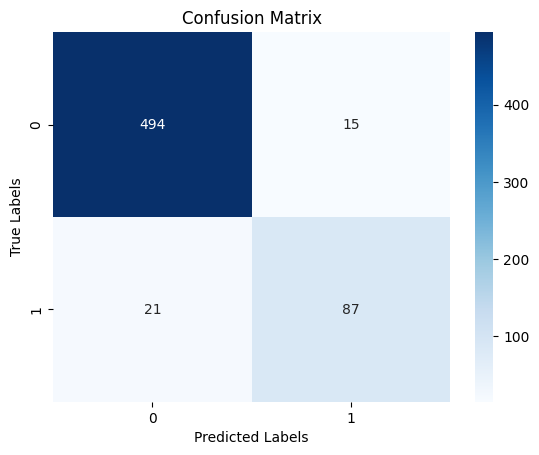

In [59]:
# import xgboost as xgb
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix
# # import seaborn as sns
# # import matplotlib.pyplot as plt

# # Load the data
# # data = data_filled

# # Separate features and target
# X = data.drop(['Id', 'Class'], axis=1)
# y = data['Class']

# # Define the best parameters (I assume you have these values stored somewhere)
# best_params = study.best_params

# # Initialize XGBoost classifier with the best parameters
# clf = xgb.XGBClassifier(**best_params)

# # Set up a StratifiedKFold cross-validation
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# # Perform cross-validation and get predicted labels
predicted_labels = cross_val_predict(clf, X, y, cv=kfold)

# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y, predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# # Perform cross-validation and calculate metrics
# metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
# scores = {}
# for metric in metrics:
#     score = cross_val_score(clf, X, y, cv=kfold, scoring=metric)
#     scores[metric] = score.mean()

# # Output the average log loss across the folds
# avg_log_loss = cross_val_score(clf, X, y, cv=kfold, scoring='neg_log_loss').mean()
# avg_log_loss = scores['neg_log_loss']
# print(f'Average Log Loss: {avg_log_loss}')

# # Print the results
# for metric, score in scores.items():
#     print(f'Average {metric.capitalize()}: {score}')


In [23]:
import optuna.visualization as vis

# Plot optimization history
vis.plot_optimization_history(study)

# Plot a parallel coordinate plot of hyperparameters
vis.plot_parallel_coordinate(study)



In [24]:
optuna.visualization.plot_slice(study)